## EXP_2467_seq_prune_0_4_128_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
round0 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 1s - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.0295 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 1s - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0306 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 1s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0455 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 1s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0502 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 1s - loss: 3.8781e-06 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9930


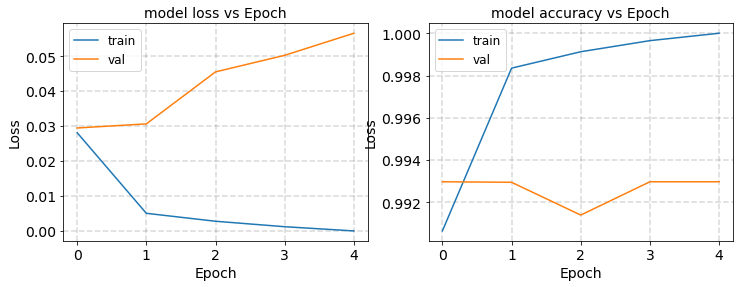

2
Epoch 1/5
1250/1250 - 1s - loss: 0.0638 - accuracy: 0.9883 - val_loss: 0.0546 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 1s - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0599 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 1s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0668 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 1s - loss: 1.2861e-05 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 3.2310e-06 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9906


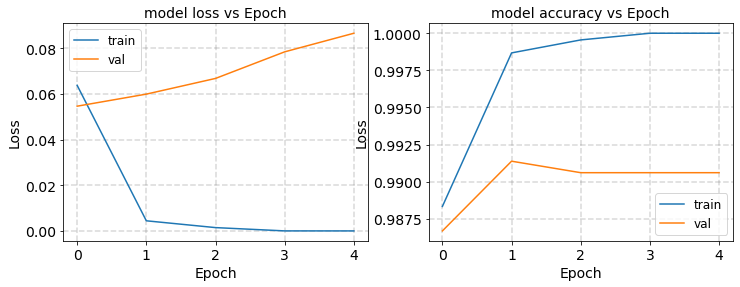

7
Epoch 1/5
1250/1250 - 1s - loss: 0.0562 - accuracy: 0.9903 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 1s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0492 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 1s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0721 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 1s - loss: 5.0469e-06 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 1s - loss: 5.4109e-07 - accuracy: 1.0000 - val_loss: 0.1129 - val_accuracy: 0.9930


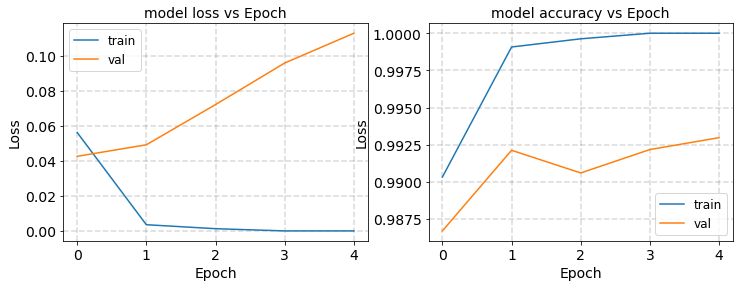

6
Epoch 1/5
1250/1250 - 1s - loss: 0.0858 - accuracy: 0.9927 - val_loss: 0.0338 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 1s - loss: 3.0414e-04 - accuracy: 0.9999 - val_loss: 0.0484 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 1s - loss: 2.4347e-06 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 1s - loss: 5.4260e-07 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 1s - loss: 1.8944e-07 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9936


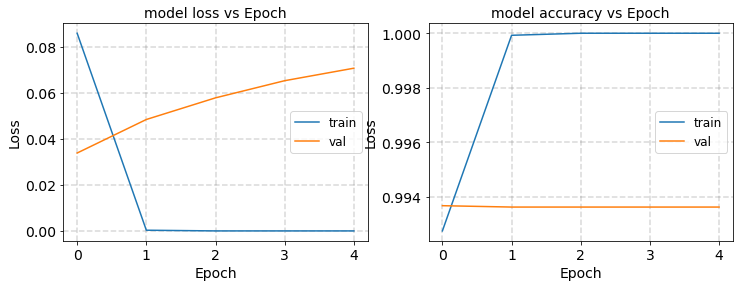

round1 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 1s - loss: 0.0711 - accuracy: 0.9873 - val_loss: 0.0317 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 1s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0575 - val_accuracy: 0.9852
Epoch 3/5
1250/1250 - 1s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0670 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 1s - loss: 7.0255e-06 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9899
Epoch 5/5
1250/1250 - 1s - loss: 4.9773e-07 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9899


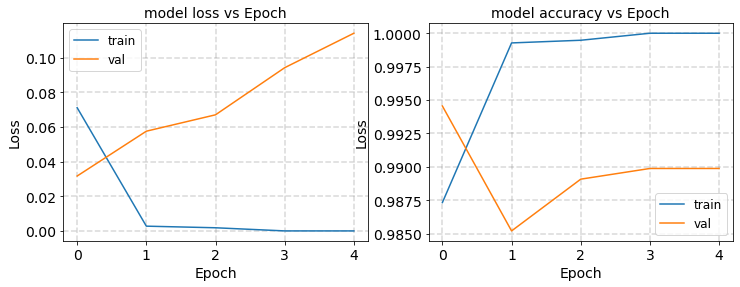

6
Epoch 1/5
1250/1250 - 1s - loss: 0.0684 - accuracy: 0.9904 - val_loss: 0.0482 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 1s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0725 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 1s - loss: 3.0831e-05 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 1s - loss: 7.8540e-06 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 1s - loss: 2.8563e-06 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9929


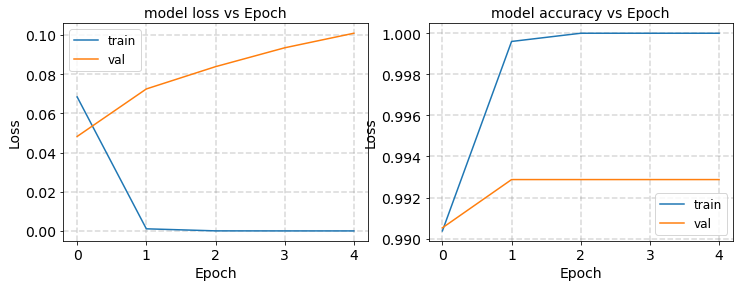

7
Epoch 1/5
1250/1250 - 1s - loss: 0.0913 - accuracy: 0.9877 - val_loss: 0.0431 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 1s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0610 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 1s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0630 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 1s - loss: 6.9195e-04 - accuracy: 0.9998 - val_loss: 0.0923 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 1s - loss: 1.1295e-05 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9930


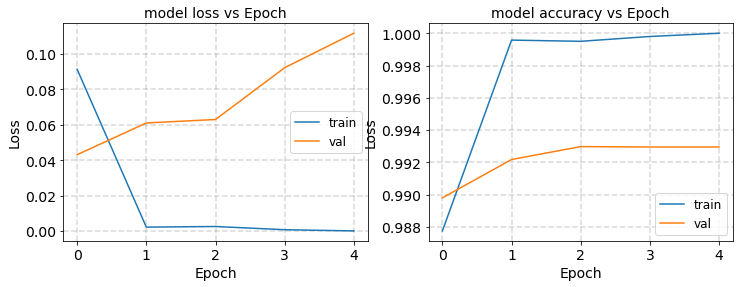

2
Epoch 1/5
1250/1250 - 1s - loss: 0.1194 - accuracy: 0.9840 - val_loss: 0.0599 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 1s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0590 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 1s - loss: 1.0427e-04 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 1s - loss: 1.4212e-05 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 1s - loss: 3.6640e-06 - accuracy: 1.0000 - val_loss: 0.1139 - val_accuracy: 0.9874


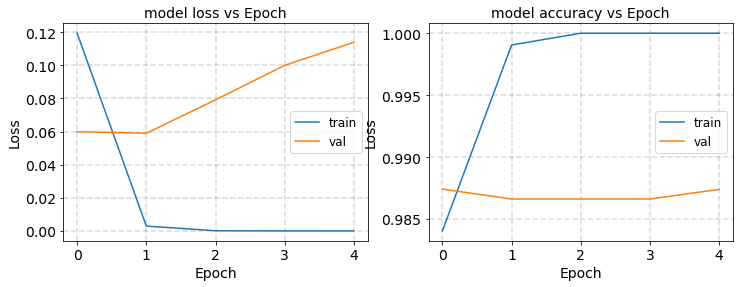

round2 [2 4 6 7]
2
Epoch 1/5
1250/1250 - 1s - loss: 1.3956e-06 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 1s - loss: 6.0122e-07 - accuracy: 1.0000 - val_loss: 0.1363 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 1s - loss: 2.7326e-07 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 1s - loss: 1.2691e-07 - accuracy: 1.0000 - val_loss: 0.1546 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 1s - loss: 6.1003e-08 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 0.9874


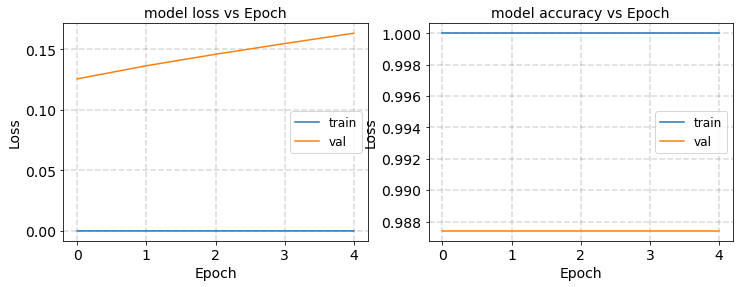

4
Epoch 1/5
1250/1250 - 1s - loss: 0.1145 - accuracy: 0.9899 - val_loss: 0.0709 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 1s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0929 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 1s - loss: 2.7193e-05 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 1s - loss: 6.6548e-06 - accuracy: 1.0000 - val_loss: 0.1191 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 1s - loss: 2.3843e-06 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9906


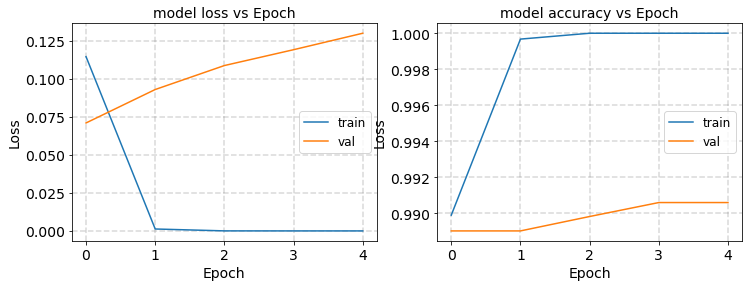

6
Epoch 1/5
1250/1250 - 1s - loss: 0.0880 - accuracy: 0.9897 - val_loss: 0.0626 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 1s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0611 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 1s - loss: 9.8791e-06 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 1s - loss: 2.5594e-06 - accuracy: 1.0000 - val_loss: 0.0822 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 1s - loss: 9.8239e-07 - accuracy: 1.0000 - val_loss: 0.0894 - val_accuracy: 0.9921


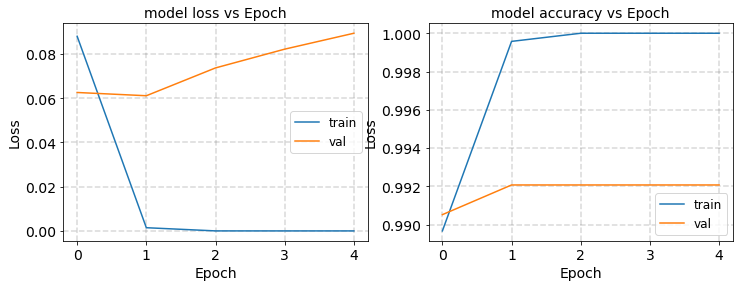

7
Epoch 1/5
1250/1250 - 1s - loss: 0.1739 - accuracy: 0.9885 - val_loss: 0.0469 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 1s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0680 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 1s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0984 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 1s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0815 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 1s - loss: 2.4669e-05 - accuracy: 1.0000 - val_loss: 0.1081 - val_accuracy: 0.9899


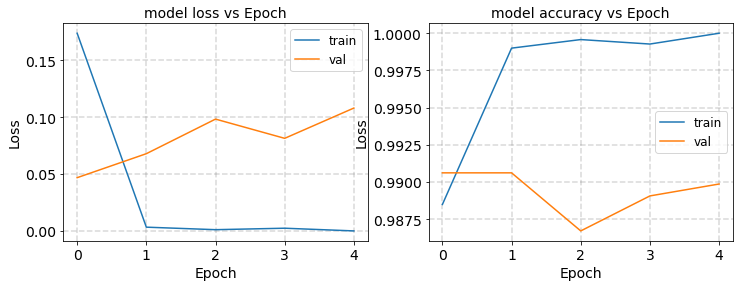

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

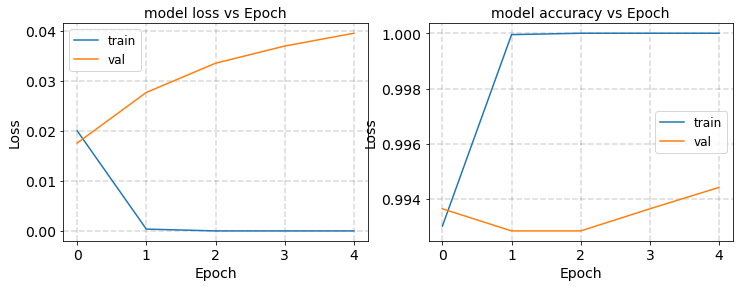

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0480 - accuracy: 0.9908 - val_loss: 0.0475 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0256 - val_accuracy: 0.9954
Epoch 3/5
1250/1250 - 2s - loss: 3.7039e-05 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 3.6379e-06 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 1.1981e-06 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9930


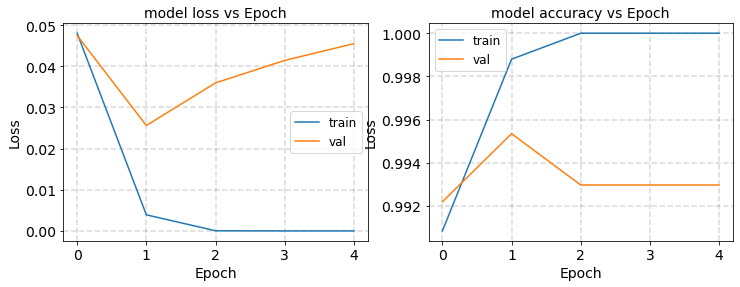

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0703 - accuracy: 0.9881 - val_loss: 0.0310 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0460 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 4.4640e-05 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 7.6302e-06 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 2.4479e-06 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9930


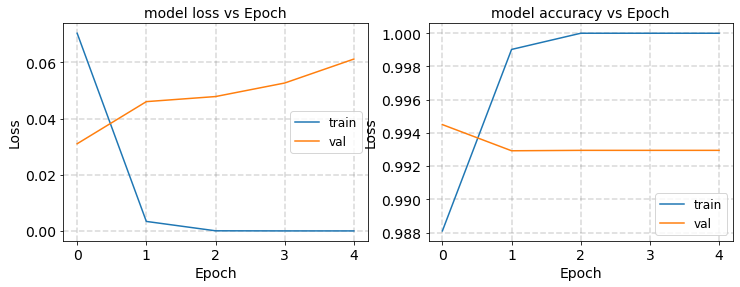

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0621 - accuracy: 0.9886 - val_loss: 0.0436 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0653 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 1s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0686 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 2.0247e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 6.7303e-06 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9890


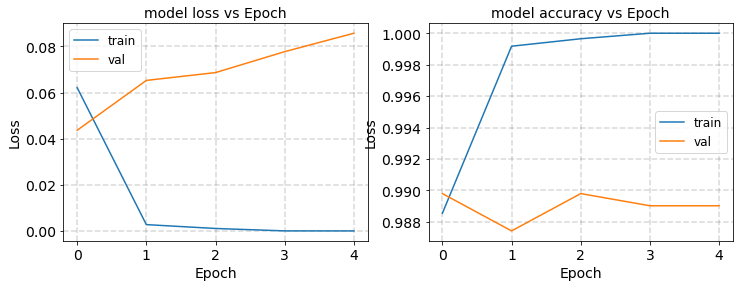

round1 [2 6 4 7]
2
Epoch 1/5
1250/1250 - 2s - loss: 2.3727e-06 - accuracy: 1.0000 - val_loss: 0.0954 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 8.7372e-07 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 3.8422e-07 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 1.8766e-07 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 9.1628e-08 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9898


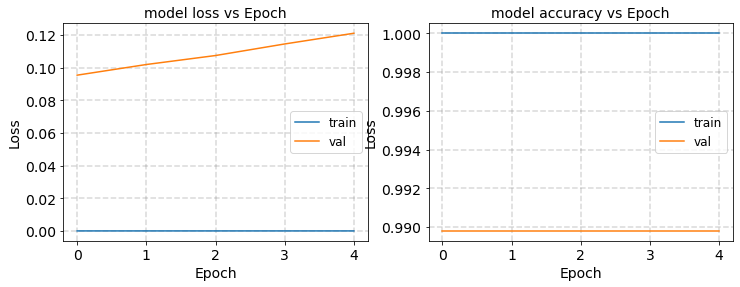

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0844 - accuracy: 0.9884 - val_loss: 0.0332 - val_accuracy: 0.9912
Epoch 2/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0344 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 1.3600e-04 - accuracy: 0.9999 - val_loss: 0.0570 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 3.5376e-06 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 1.2647e-06 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9929


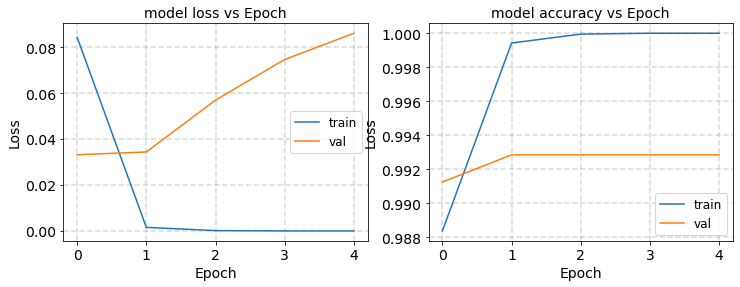

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0813 - accuracy: 0.9885 - val_loss: 0.0480 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0680 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0724 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 2.2138e-05 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 6.3353e-06 - accuracy: 1.0000 - val_loss: 0.1050 - val_accuracy: 0.9890


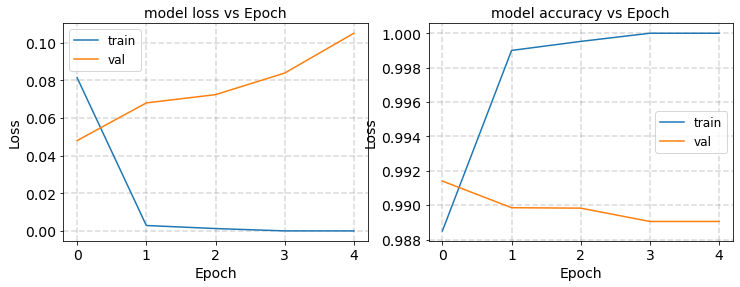

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0837 - accuracy: 0.9876 - val_loss: 0.0504 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0579 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1141 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 1.0953e-05 - accuracy: 1.0000 - val_loss: 0.1368 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 3.8965e-06 - accuracy: 1.0000 - val_loss: 0.1521 - val_accuracy: 0.9930


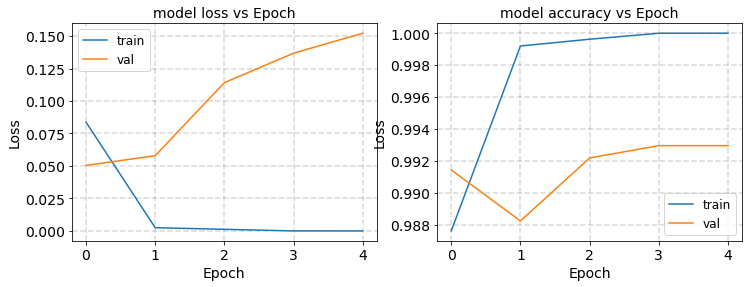

round2 [6 4 2 7]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.1284 - accuracy: 0.9880 - val_loss: 0.0566 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.0570 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 3.9461e-05 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 2s - loss: 7.9231e-06 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 2.9403e-06 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9905


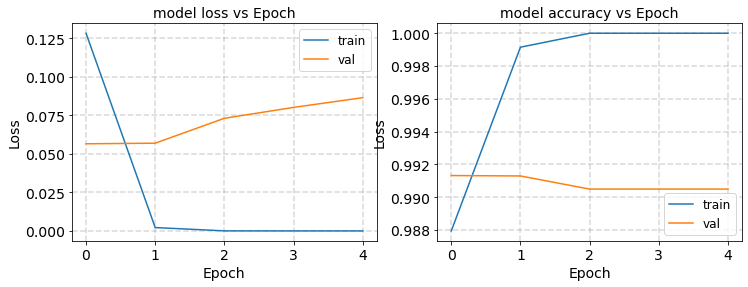

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0625 - accuracy: 0.9905 - val_loss: 0.0543 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 5.8784e-04 - accuracy: 0.9999 - val_loss: 0.0777 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 5.1800e-05 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 1.3475e-05 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 3.2679e-06 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9913


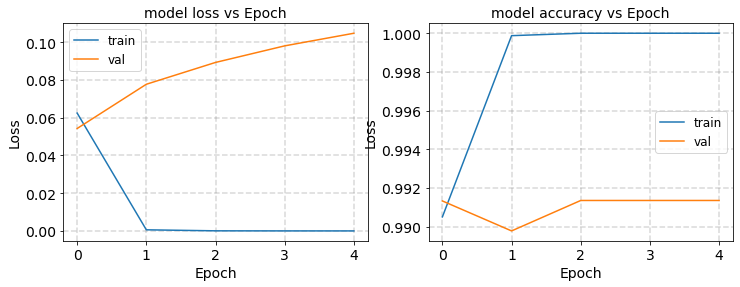

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0918 - accuracy: 0.9867 - val_loss: 0.0559 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0683 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 3.5146e-05 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 8.1410e-06 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 2.7641e-06 - accuracy: 1.0000 - val_loss: 0.1032 - val_accuracy: 0.9898


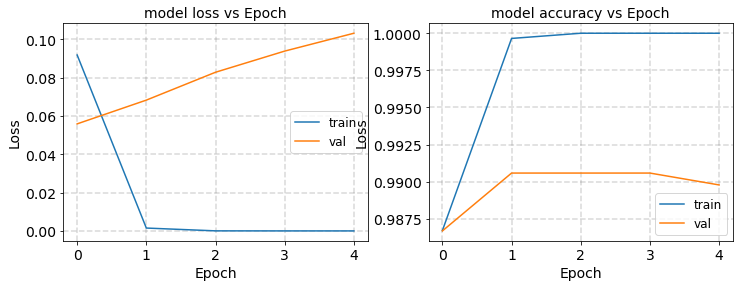

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0789 - accuracy: 0.9906 - val_loss: 0.0535 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0667 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 3.0415e-05 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 7.6120e-06 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 2.3979e-06 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9922


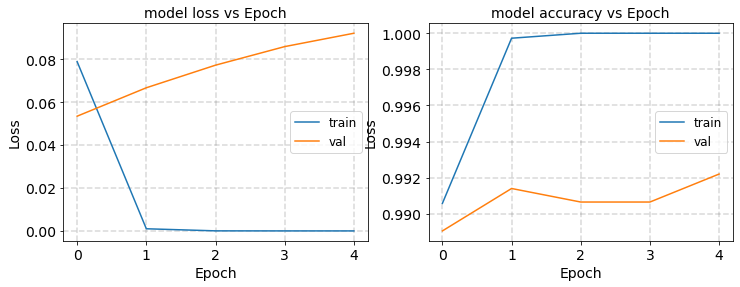

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

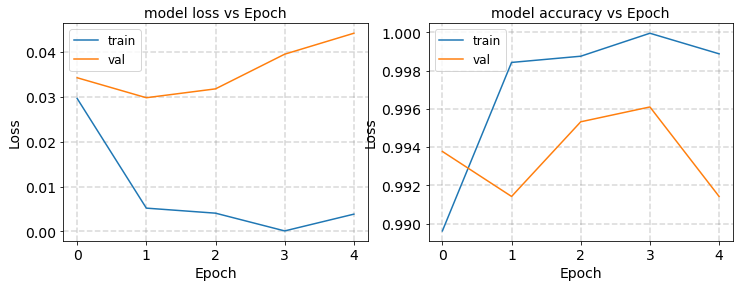

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0556 - accuracy: 0.9899 - val_loss: 0.0262 - val_accuracy: 0.9938
Epoch 2/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0279 - val_accuracy: 0.9961
Epoch 3/5
1250/1250 - 2s - loss: 1.1648e-05 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9961
Epoch 4/5
1250/1250 - 2s - loss: 1.2310e-06 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9961
Epoch 5/5
1250/1250 - 2s - loss: 4.6072e-07 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9961


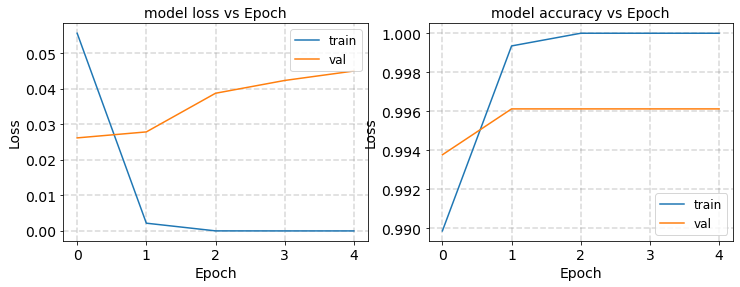

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0871 - accuracy: 0.9897 - val_loss: 0.0529 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0563 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 1.2778e-05 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 1.7307e-06 - accuracy: 1.0000 - val_loss: 0.0885 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 5.1215e-07 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9906


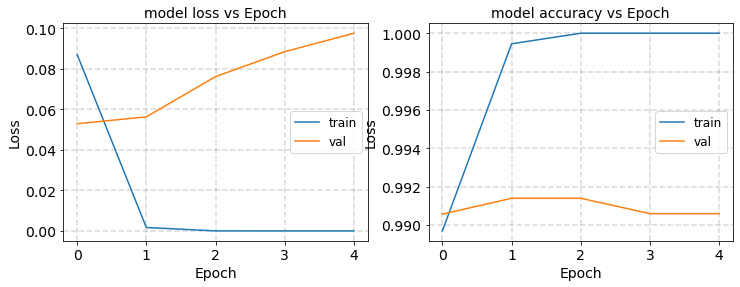

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0592 - accuracy: 0.9912 - val_loss: 0.0369 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 2s - loss: 3.4535e-05 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 4.5221e-06 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 1.7981e-06 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 7.8107e-07 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9929


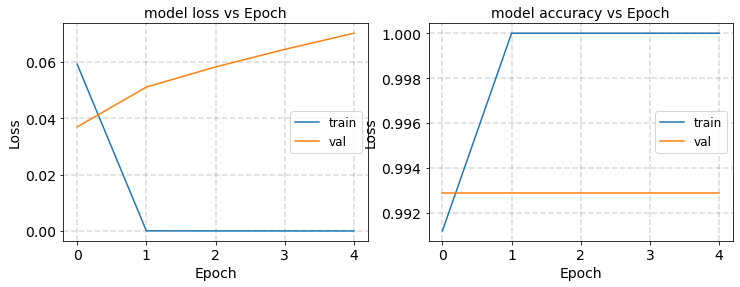

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0834 - accuracy: 0.9891 - val_loss: 0.0326 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0426 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0362 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 2s - loss: 4.2604e-05 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 7.6295e-06 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9937


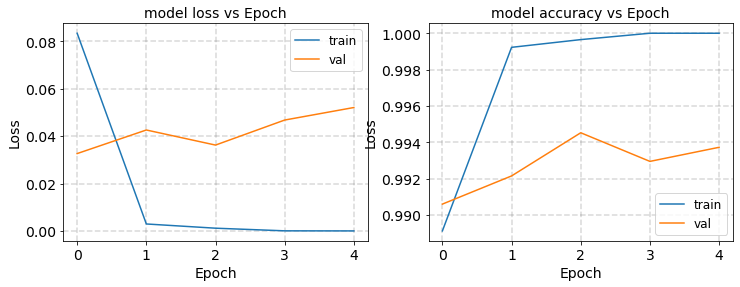

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0668 - accuracy: 0.9880 - val_loss: 0.0365 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0525 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 5.7408e-04 - accuracy: 0.9998 - val_loss: 0.0552 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 2.5659e-05 - accuracy: 1.0000 - val_loss: 0.0667 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 2s - loss: 5.0451e-06 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9937


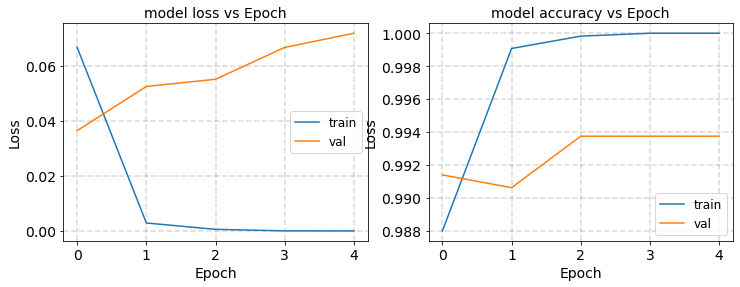

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0576 - accuracy: 0.9921 - val_loss: 0.0436 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 2.9385e-04 - accuracy: 0.9999 - val_loss: 0.0629 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 2s - loss: 1.4458e-05 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 2s - loss: 4.9572e-06 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 1.6852e-06 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9913


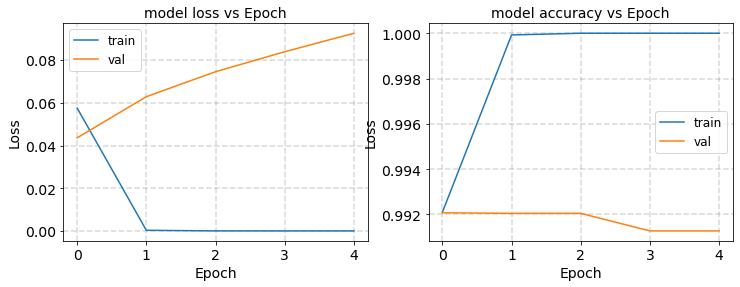

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1068 - accuracy: 0.9861 - val_loss: 0.0627 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0784 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 2s - loss: 7.2398e-05 - accuracy: 1.0000 - val_loss: 0.0964 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 1.1840e-05 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 4.0279e-06 - accuracy: 1.0000 - val_loss: 0.1227 - val_accuracy: 0.9890


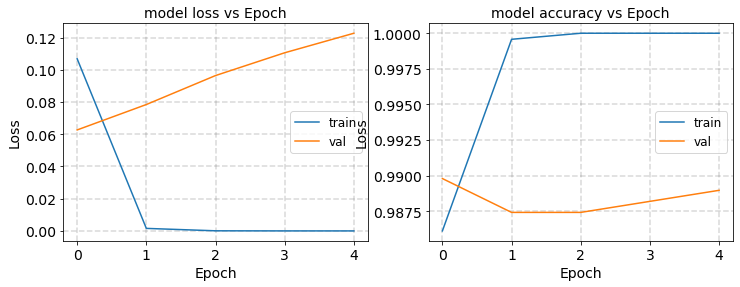

round2 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.0901 - accuracy: 0.9844 - val_loss: 0.0409 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0646 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0406 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0695 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 2.3081e-04 - accuracy: 0.9999 - val_loss: 0.0923 - val_accuracy: 0.9883


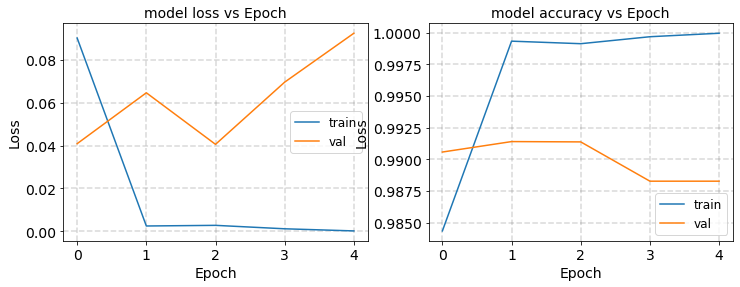

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0573 - accuracy: 0.9915 - val_loss: 0.0274 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 2s - loss: 8.1376e-05 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 2s - loss: 8.4261e-06 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 2s - loss: 9.1536e-07 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 2s - loss: 2.9383e-07 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9936


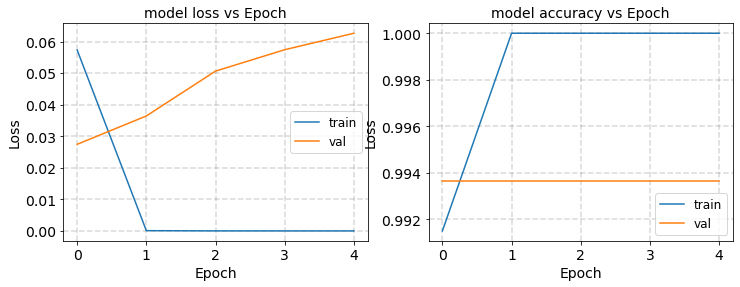

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0995 - accuracy: 0.9868 - val_loss: 0.0687 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0873 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 1.0710e-04 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 8.5043e-06 - accuracy: 1.0000 - val_loss: 0.1240 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 2.3188e-06 - accuracy: 1.0000 - val_loss: 0.1357 - val_accuracy: 0.9883


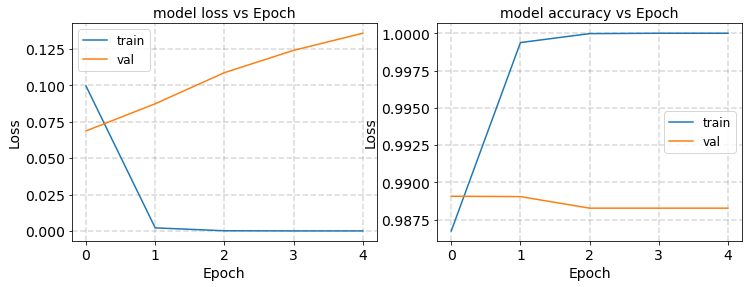

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0903 - accuracy: 0.9911 - val_loss: 0.0344 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0605 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 4.8685e-05 - accuracy: 1.0000 - val_loss: 0.0710 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 2s - loss: 7.8660e-06 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 2s - loss: 1.7445e-06 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9937


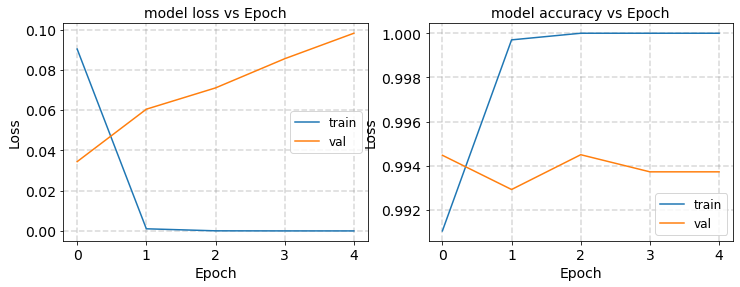

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

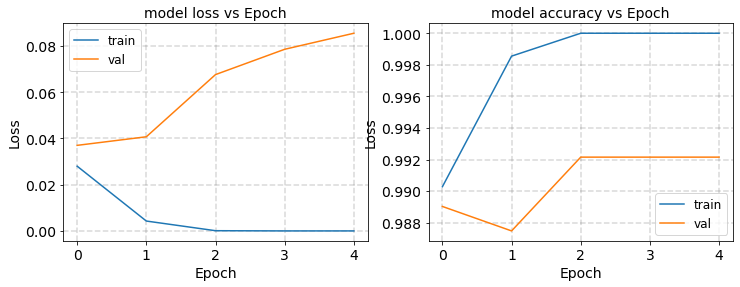

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0477 - accuracy: 0.9926 - val_loss: 0.0239 - val_accuracy: 0.9960
Epoch 2/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0182 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 2s - loss: 4.1858e-06 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 7.9751e-07 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 2s - loss: 2.7863e-07 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 0.9952


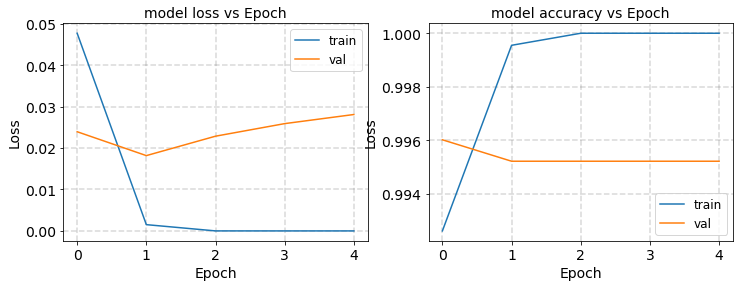

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0765 - accuracy: 0.9911 - val_loss: 0.0269 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0573 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0306 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 2s - loss: 1.5987e-04 - accuracy: 0.9999 - val_loss: 0.0458 - val_accuracy: 0.9946
Epoch 5/5
1250/1250 - 2s - loss: 1.2047e-06 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9946


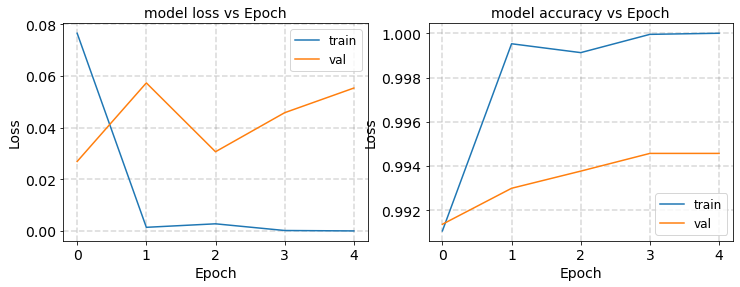

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0858 - accuracy: 0.9859 - val_loss: 0.0516 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0930 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0760 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 2s - loss: 3.7009e-04 - accuracy: 0.9999 - val_loss: 0.1162 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 2.7997e-05 - accuracy: 1.0000 - val_loss: 0.1380 - val_accuracy: 0.9883


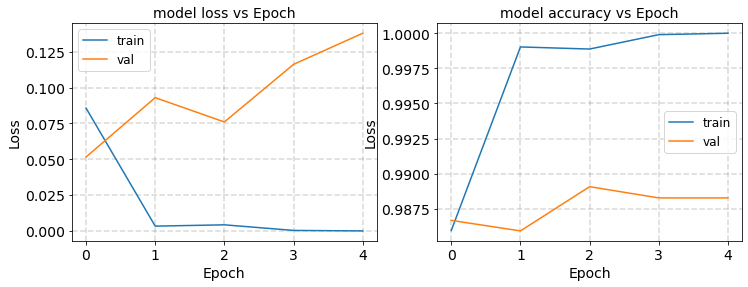

round1 [6 4 7 2]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0513 - accuracy: 0.9927 - val_loss: 0.0240 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 2s - loss: 1.1026e-04 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 1.0916e-05 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 1.7896e-06 - accuracy: 1.0000 - val_loss: 0.0514 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 5.7484e-07 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9921


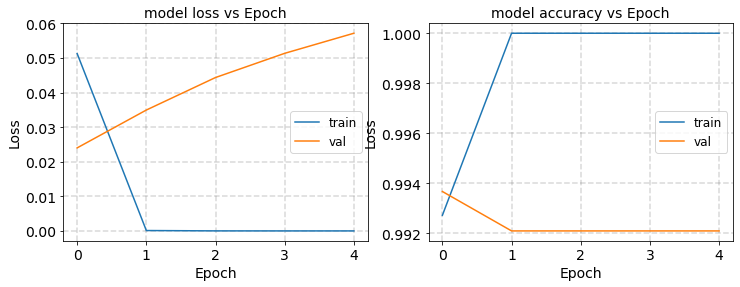

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0750 - accuracy: 0.9899 - val_loss: 0.0569 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 5.1600e-04 - accuracy: 0.9998 - val_loss: 0.0746 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0983 - val_accuracy: 0.9915
Epoch 4/5
1250/1250 - 2s - loss: 1.0270e-05 - accuracy: 1.0000 - val_loss: 0.1113 - val_accuracy: 0.9915
Epoch 5/5
1250/1250 - 2s - loss: 2.4678e-06 - accuracy: 1.0000 - val_loss: 0.1246 - val_accuracy: 0.9915


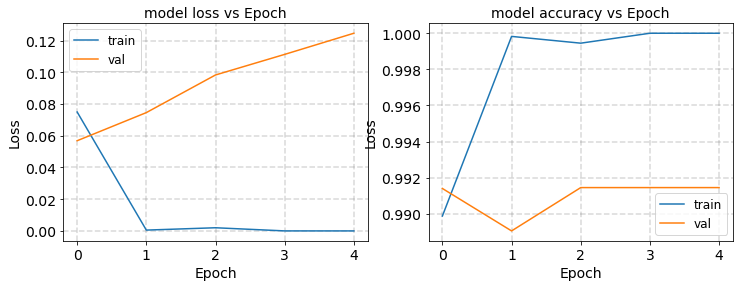

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0535 - accuracy: 0.9928 - val_loss: 0.0361 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 2.7716e-04 - accuracy: 0.9999 - val_loss: 0.0586 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 1.2077e-05 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 3.2303e-06 - accuracy: 1.0000 - val_loss: 0.0744 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 1.0833e-06 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9938


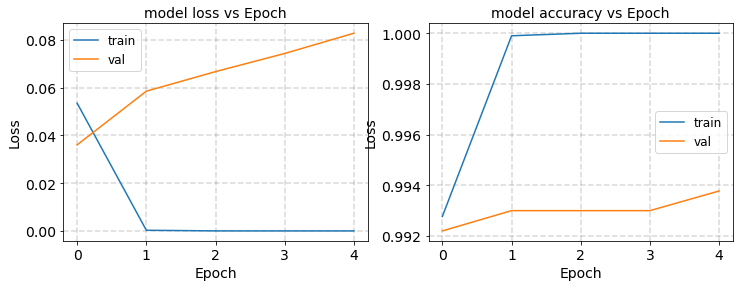

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1377 - accuracy: 0.9828 - val_loss: 0.0638 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 2s - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0930 - val_accuracy: 0.9844
Epoch 3/5
1250/1250 - 2s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0885 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1306 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0966 - val_accuracy: 0.9930


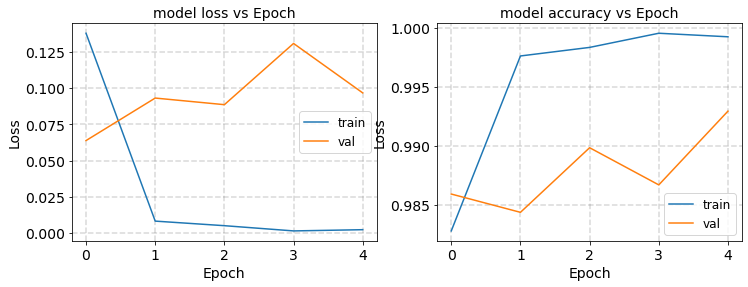

round2 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 2s - loss: 1.0639e-04 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 8.3792e-06 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 3.3853e-06 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 9.5048e-07 - accuracy: 1.0000 - val_loss: 0.1410 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 4.4676e-07 - accuracy: 1.0000 - val_loss: 0.1532 - val_accuracy: 0.9922


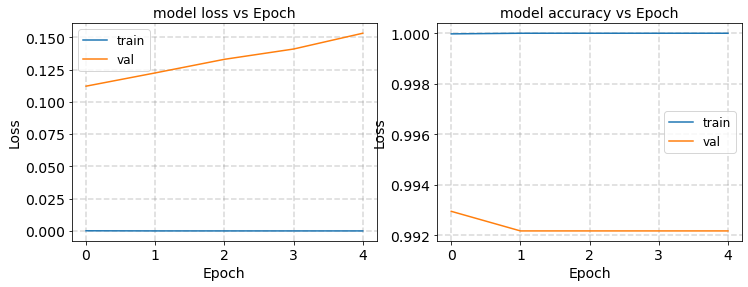

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1332 - accuracy: 0.9811 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0372 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0394 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 8.0024e-05 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 2s - loss: 1.9111e-05 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9937


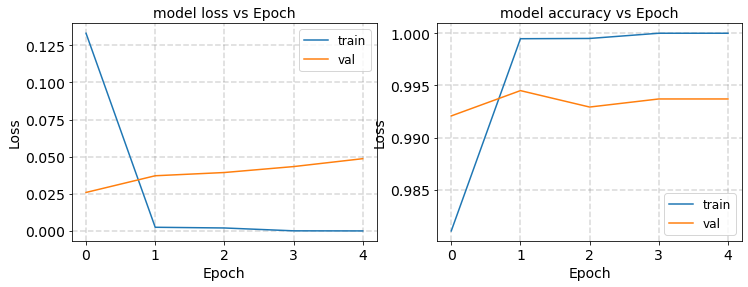

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1687 - accuracy: 0.9789 - val_loss: 0.0291 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0342 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0479 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0435 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 5.0765e-05 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 0.9937


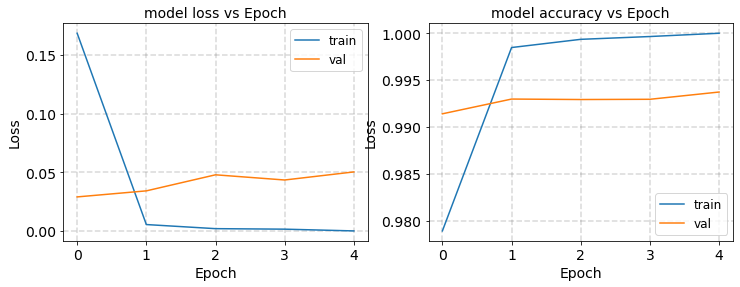

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0798 - accuracy: 0.9831 - val_loss: 0.0548 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0798 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0930 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 7.4347e-04 - accuracy: 0.9998 - val_loss: 0.1055 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.1026 - val_accuracy: 0.9930


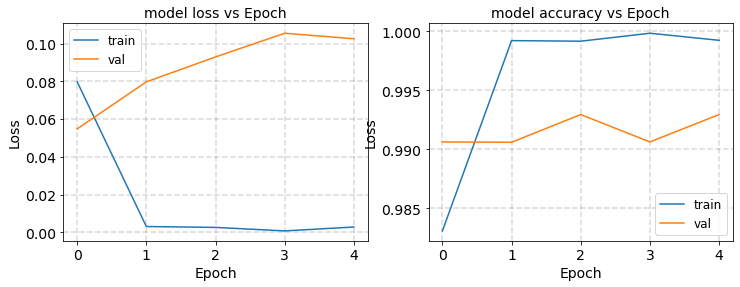

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

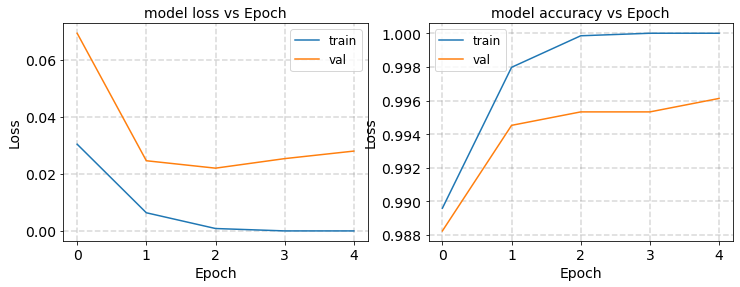

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0534 - accuracy: 0.9896 - val_loss: 0.0450 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0625 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 3.3756e-05 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 4.7316e-06 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 1.4030e-06 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9883


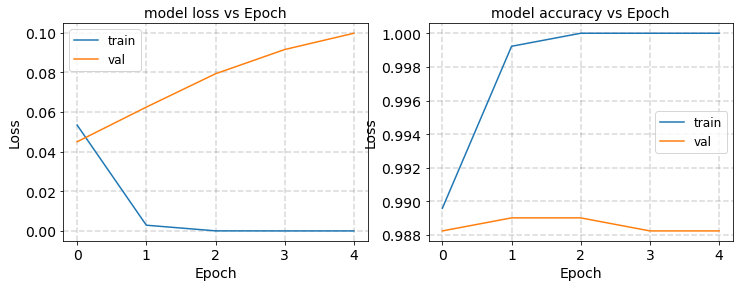

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0645 - accuracy: 0.9887 - val_loss: 0.0477 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0487 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 6.9028e-04 - accuracy: 0.9999 - val_loss: 0.0570 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 6.3361e-06 - accuracy: 1.0000 - val_loss: 0.0835 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 4.9943e-07 - accuracy: 1.0000 - val_loss: 0.0894 - val_accuracy: 0.9929


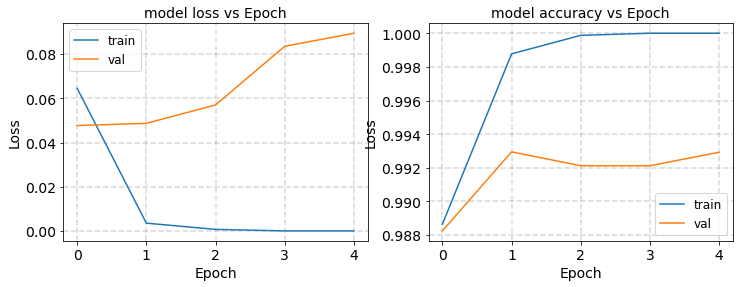

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0829 - accuracy: 0.9914 - val_loss: 0.0362 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 2s - loss: 2.6639e-04 - accuracy: 0.9999 - val_loss: 0.0443 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 2s - loss: 1.6718e-05 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 5.5348e-06 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 1.6173e-06 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9937


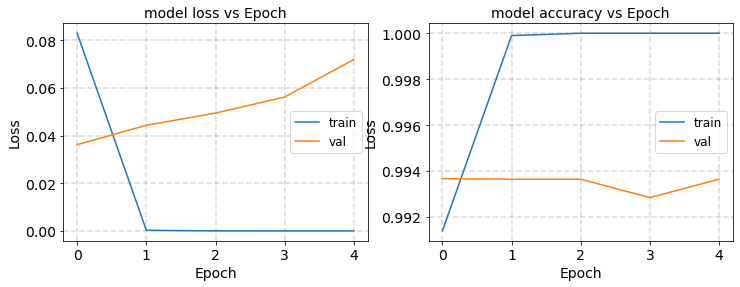

round1 [4 7 2 6]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.0718 - accuracy: 0.9848 - val_loss: 0.0264 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0362 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0398 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 6.0412e-05 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 6.5963e-06 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9938


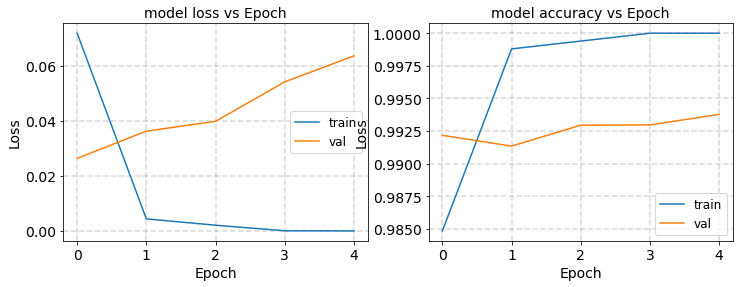

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0720 - accuracy: 0.9901 - val_loss: 0.0702 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0444 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 5.2701e-05 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 1.0890e-05 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 3.1976e-06 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9914


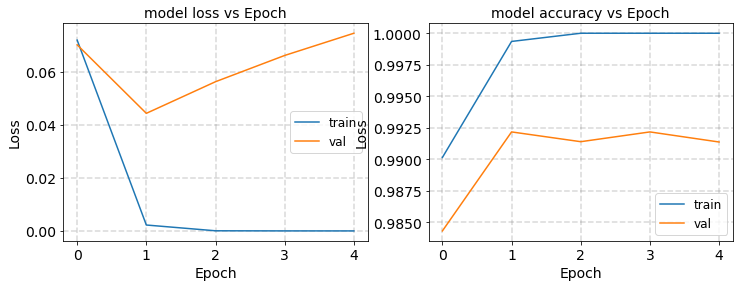

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1117 - accuracy: 0.9818 - val_loss: 0.0520 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0735 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 3.4249e-05 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9899
Epoch 4/5
1250/1250 - 2s - loss: 8.8313e-06 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 0.9899
Epoch 5/5
1250/1250 - 2s - loss: 2.9596e-06 - accuracy: 1.0000 - val_loss: 0.1169 - val_accuracy: 0.9899


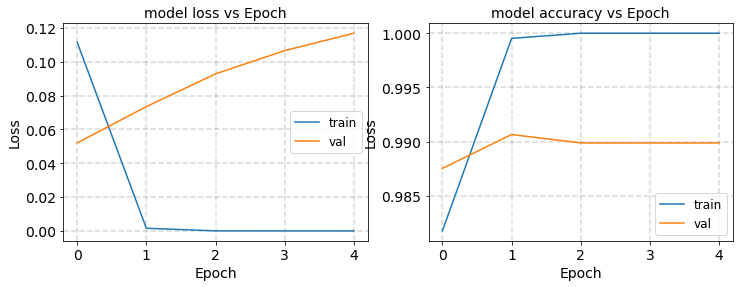

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0855 - accuracy: 0.9865 - val_loss: 0.0403 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 4.6801e-04 - accuracy: 0.9999 - val_loss: 0.0440 - val_accuracy: 0.9953
Epoch 3/5
1250/1250 - 2s - loss: 2.9595e-05 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 2s - loss: 5.3794e-06 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 2s - loss: 1.5176e-06 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9937


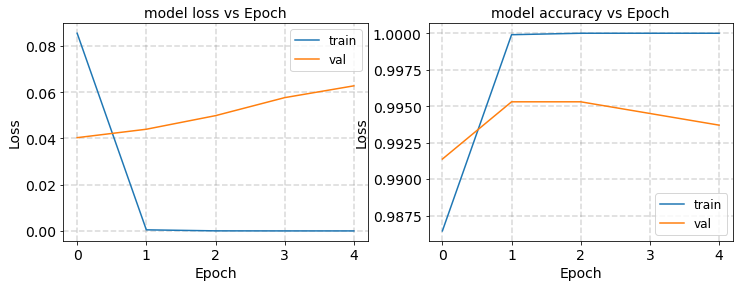

round2 [2 6 4 7]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.0666 - accuracy: 0.9900 - val_loss: 0.0662 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0934 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 7.9969e-04 - accuracy: 0.9998 - val_loss: 0.0987 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 3.6055e-05 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 9.1037e-06 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9882


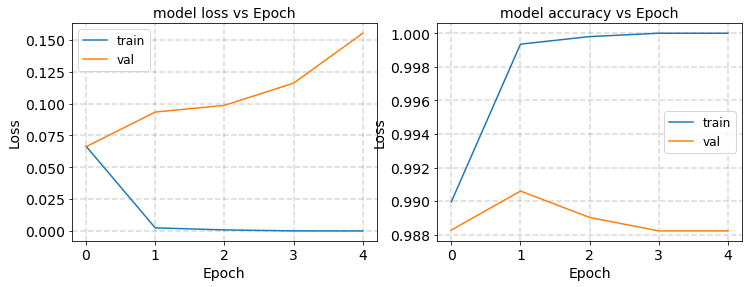

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0686 - accuracy: 0.9885 - val_loss: 0.0634 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 1.3181e-04 - accuracy: 1.0000 - val_loss: 0.0850 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 2.5080e-05 - accuracy: 1.0000 - val_loss: 0.0964 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 8.3243e-06 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 3.2518e-06 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9921


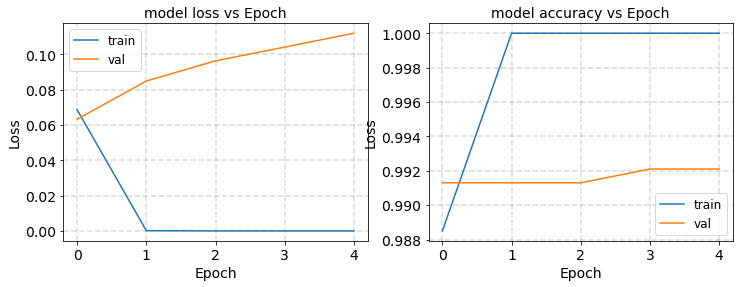

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0931 - accuracy: 0.9847 - val_loss: 0.0410 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0617 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0906 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 5.9885e-04 - accuracy: 0.9998 - val_loss: 0.1014 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0697 - val_accuracy: 0.9906


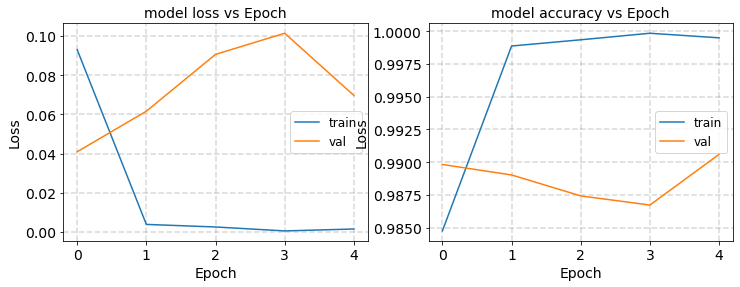

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0572 - accuracy: 0.9894 - val_loss: 0.0485 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 4.6654e-04 - accuracy: 0.9999 - val_loss: 0.0553 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 3.8228e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 8.4532e-06 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 2.5279e-06 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9913


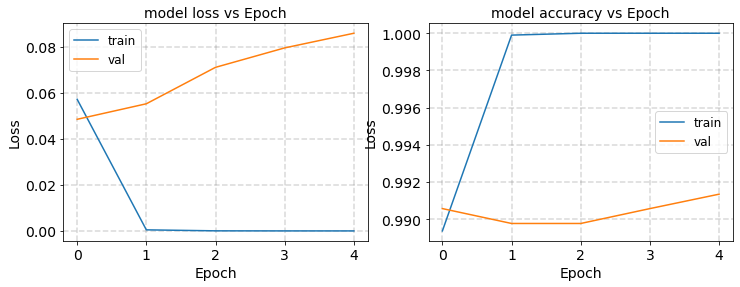

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
________________________________________________

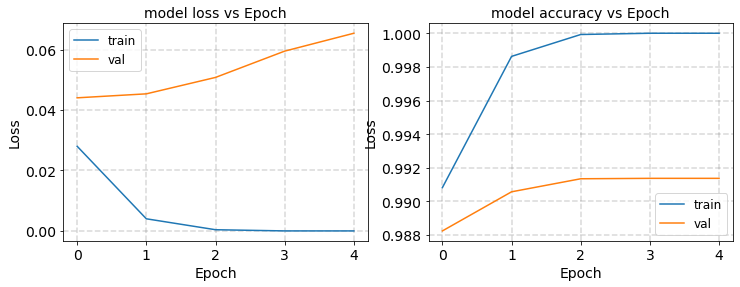

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0539 - accuracy: 0.9897 - val_loss: 0.0312 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0320 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 7.5432e-04 - accuracy: 0.9998 - val_loss: 0.0605 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 9.6518e-06 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 2.8002e-06 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9898


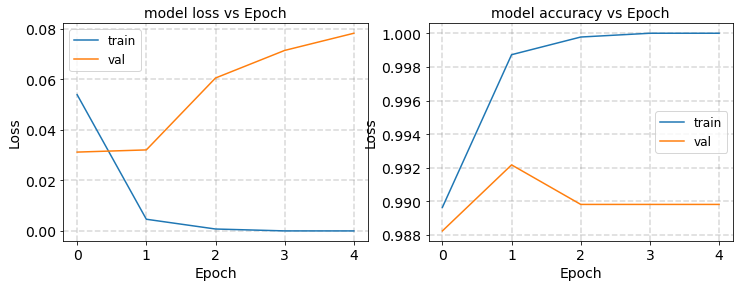

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0676 - accuracy: 0.9863 - val_loss: 0.0354 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0560 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0596 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0559 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 1.9740e-05 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 0.9937


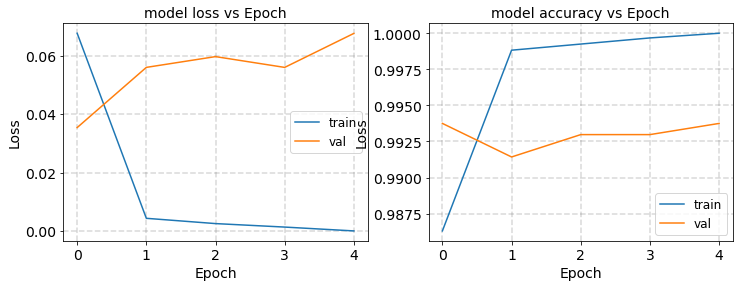

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0676 - accuracy: 0.9922 - val_loss: 0.0441 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0458 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 1.9872e-05 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9928
Epoch 4/5
1250/1250 - 2s - loss: 2.4860e-06 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9928
Epoch 5/5
1250/1250 - 2s - loss: 5.9179e-07 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 0.9944


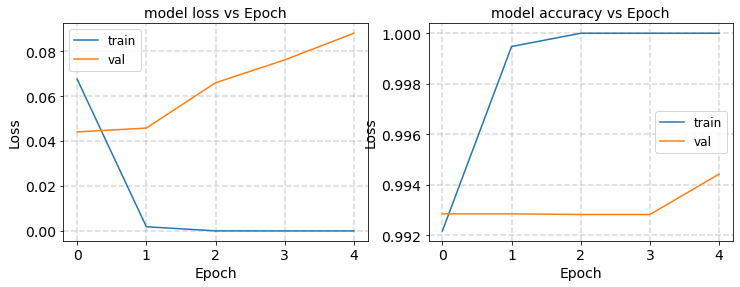

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0973 - accuracy: 0.9884 - val_loss: 0.0361 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0322 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 8.6026e-04 - accuracy: 0.9997 - val_loss: 0.0412 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 1.3105e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 3.7450e-06 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9914


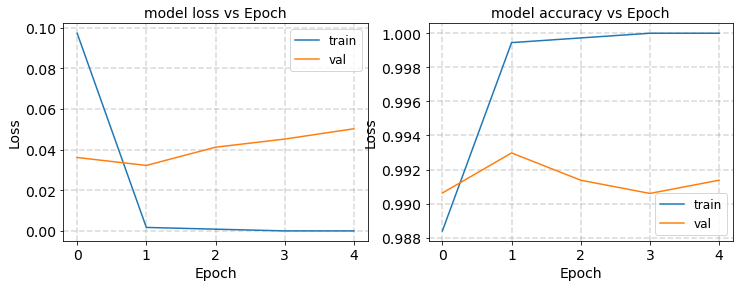

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0747 - accuracy: 0.9880 - val_loss: 0.0491 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0944 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0719 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0732 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 4.9824e-04 - accuracy: 0.9998 - val_loss: 0.1270 - val_accuracy: 0.9930


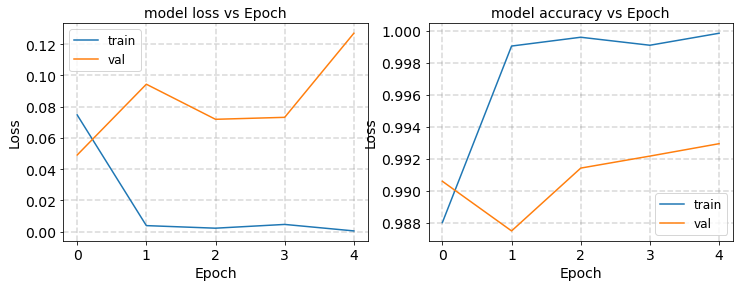

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0895 - accuracy: 0.9893 - val_loss: 0.0333 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 4.1026e-04 - accuracy: 0.9999 - val_loss: 0.0449 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 6.2370e-06 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 1.7005e-06 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 6.6120e-07 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9921


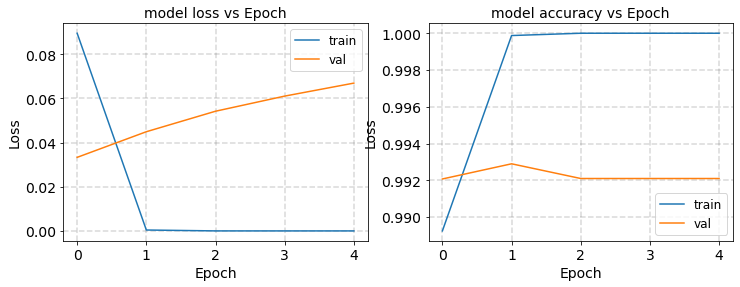

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1159 - accuracy: 0.9872 - val_loss: 0.0618 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.1118 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1238 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.1322 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1074 - val_accuracy: 0.9898


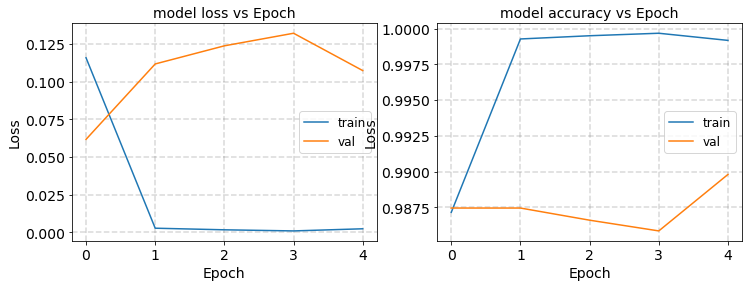

round2 [6 4 7 2]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0637 - accuracy: 0.9901 - val_loss: 0.0646 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 4.7154e-05 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 2s - loss: 5.7084e-06 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 2s - loss: 1.7678e-06 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 6.6699e-07 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 0.9882


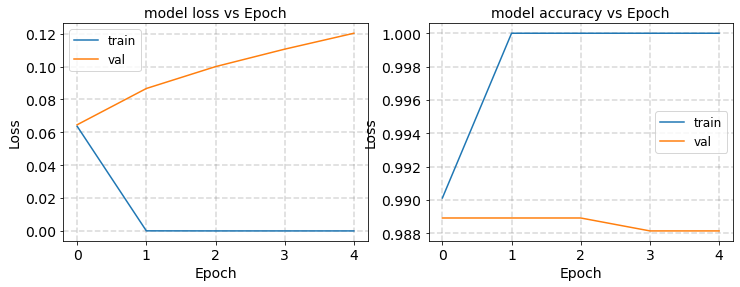

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0863 - accuracy: 0.9850 - val_loss: 0.0437 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.1054 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1130 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 5.1788e-04 - accuracy: 0.9998 - val_loss: 0.1406 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 8.2374e-05 - accuracy: 1.0000 - val_loss: 0.1588 - val_accuracy: 0.9898


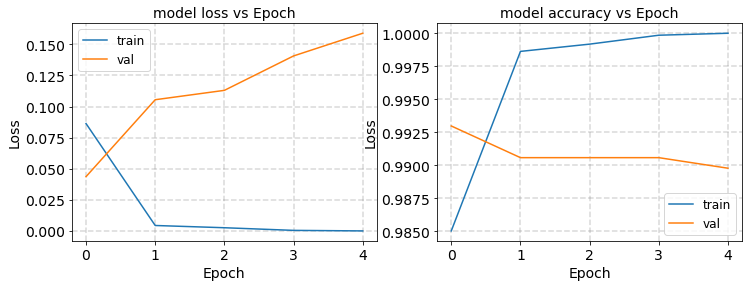

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0694 - accuracy: 0.9901 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0578 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0926 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 7.6242e-04 - accuracy: 0.9997 - val_loss: 0.0976 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1170 - val_accuracy: 0.9890


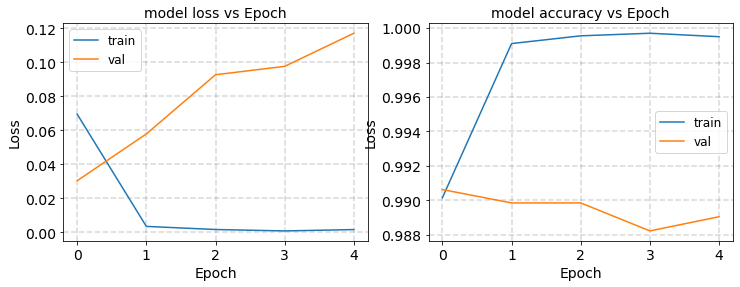

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1269 - accuracy: 0.9826 - val_loss: 0.0687 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.1136 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0953 - val_accuracy: 0.9852
Epoch 4/5
1250/1250 - 2s - loss: 1.0838e-04 - accuracy: 1.0000 - val_loss: 0.1169 - val_accuracy: 0.9844
Epoch 5/5
1250/1250 - 2s - loss: 2.2291e-05 - accuracy: 1.0000 - val_loss: 0.1316 - val_accuracy: 0.9859


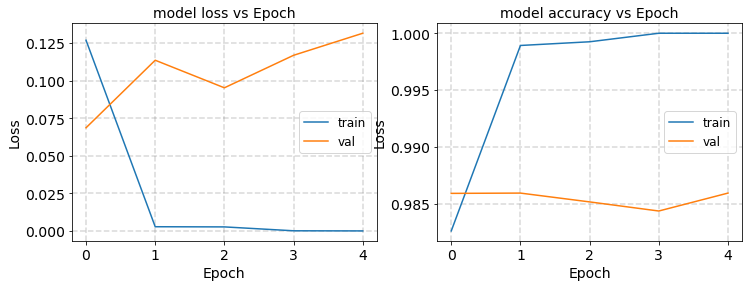

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

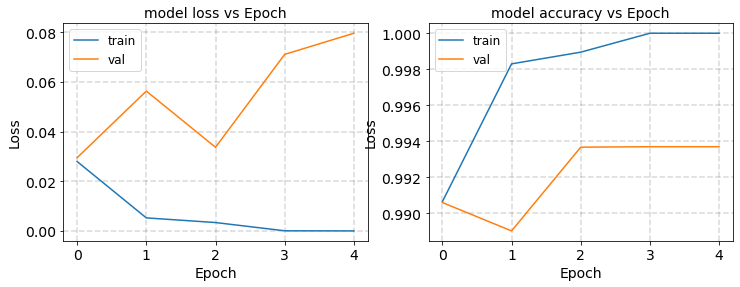

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0716 - accuracy: 0.9875 - val_loss: 0.0390 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0487 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 3.4922e-05 - accuracy: 1.0000 - val_loss: 0.0637 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 4.1590e-06 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 1.2686e-06 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9913


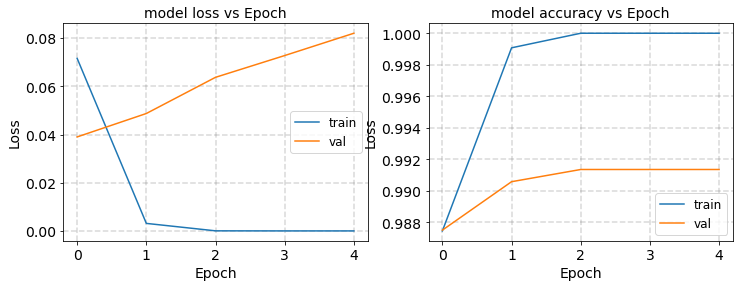

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0655 - accuracy: 0.9876 - val_loss: 0.0329 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0303 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 2s - loss: 1.8976e-04 - accuracy: 0.9999 - val_loss: 0.0420 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 2s - loss: 3.5362e-06 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 7.7032e-07 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9938


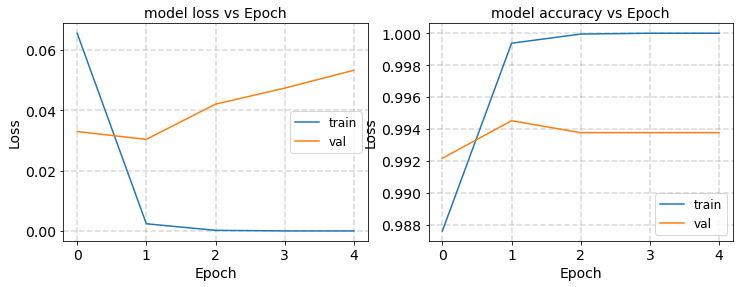

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0627 - accuracy: 0.9916 - val_loss: 0.0292 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0287 - val_accuracy: 0.9961
Epoch 3/5
1250/1250 - 2s - loss: 3.4753e-05 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 1.0345e-05 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 0.9961
Epoch 5/5
1250/1250 - 2s - loss: 4.1034e-06 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 0.9961


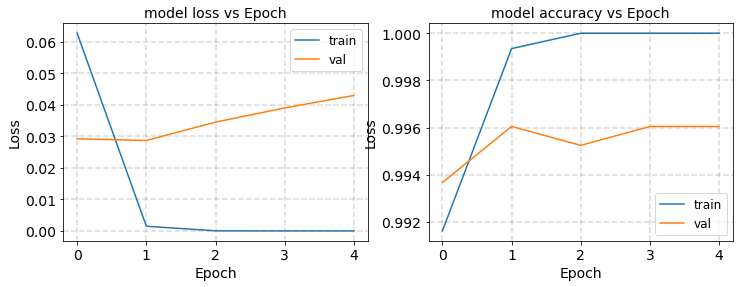

round1 [2 4 6 7]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0770 - accuracy: 0.9892 - val_loss: 0.0613 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0769 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 1.0924e-05 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 6.6112e-07 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 1.2147e-07 - accuracy: 1.0000 - val_loss: 0.1532 - val_accuracy: 0.9882


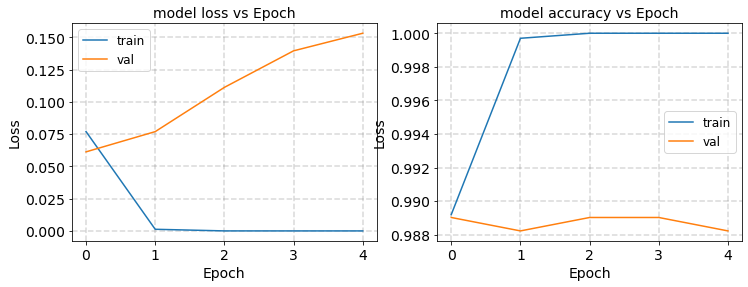

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0884 - accuracy: 0.9897 - val_loss: 0.0288 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0340 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 4.2295e-05 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 6.4306e-06 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 1.4046e-06 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9929


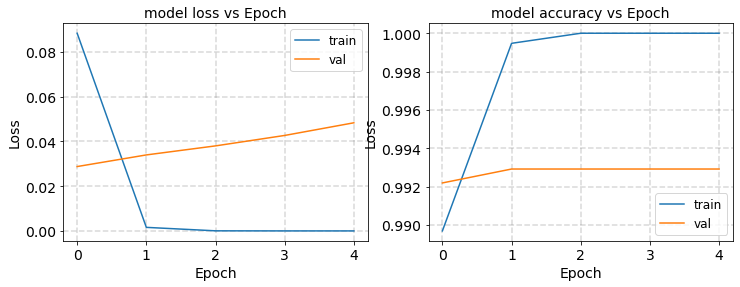

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0557 - accuracy: 0.9932 - val_loss: 0.0435 - val_accuracy: 0.9952
Epoch 2/5
1250/1250 - 2s - loss: 6.8466e-04 - accuracy: 0.9998 - val_loss: 0.0433 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 2s - loss: 1.7818e-05 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 3.3292e-06 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 2s - loss: 1.3975e-06 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 0.9952


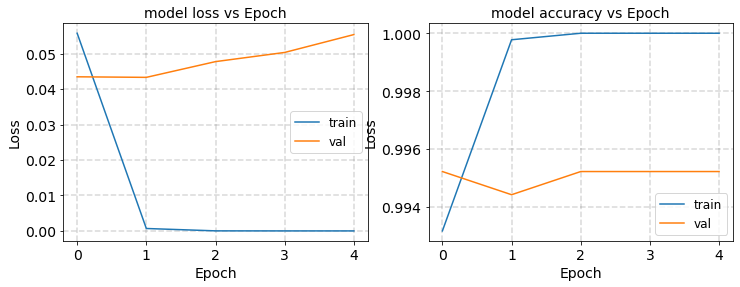

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0969 - accuracy: 0.9921 - val_loss: 0.0401 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 6.7180e-04 - accuracy: 0.9998 - val_loss: 0.0593 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 3.9618e-05 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 1.2716e-05 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 4.7293e-06 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9906


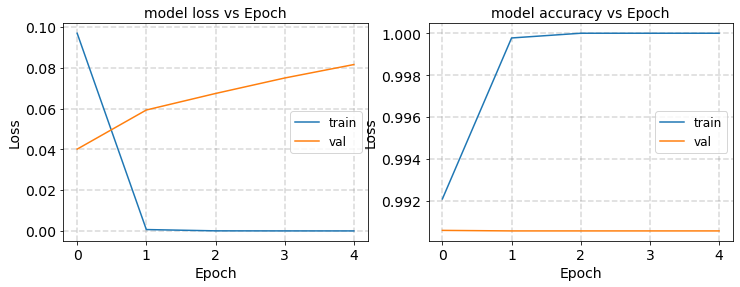

round2 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.0725 - accuracy: 0.9892 - val_loss: 0.0505 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 6.0975e-04 - accuracy: 0.9999 - val_loss: 0.0594 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 4.3163e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 1.3212e-05 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 4.7298e-06 - accuracy: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9898


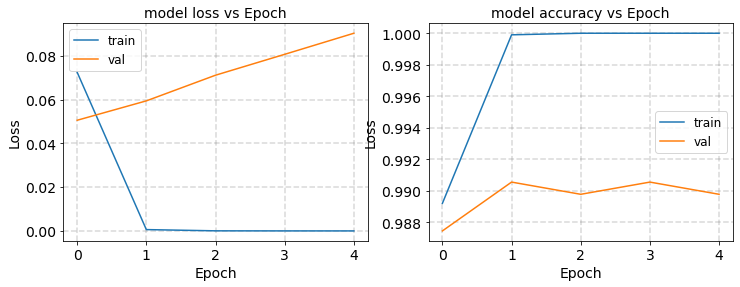

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0887 - accuracy: 0.9876 - val_loss: 0.0292 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 1.5972e-04 - accuracy: 0.9999 - val_loss: 0.0370 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 1.1933e-05 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 2.3155e-06 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 8.6380e-07 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9929


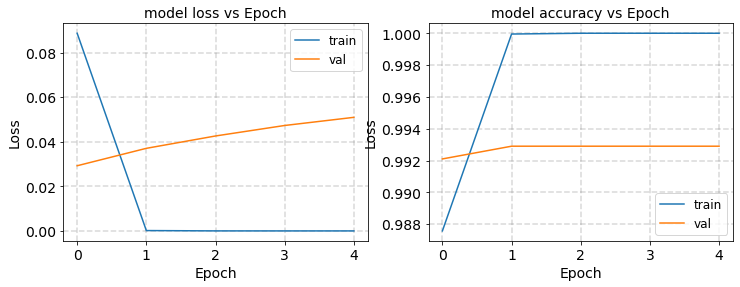

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0836 - accuracy: 0.9895 - val_loss: 0.0521 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0692 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0795 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 5.8832e-05 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 6.4408e-06 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9898


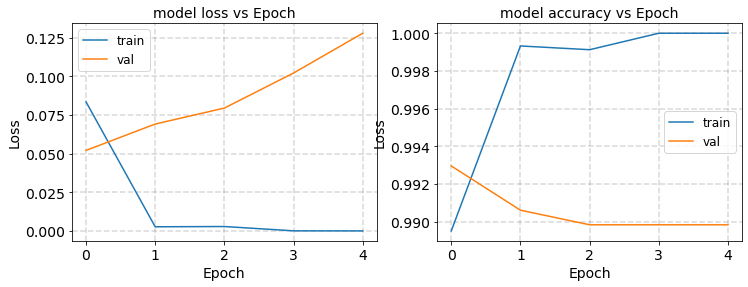

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0899 - accuracy: 0.9856 - val_loss: 0.0638 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0780 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 6.6162e-04 - accuracy: 0.9999 - val_loss: 0.1153 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 1.9918e-05 - accuracy: 1.0000 - val_loss: 0.1375 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 6.3665e-06 - accuracy: 1.0000 - val_loss: 0.1565 - val_accuracy: 0.9922


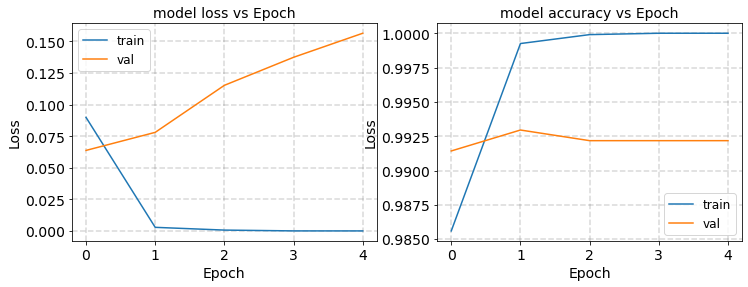

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

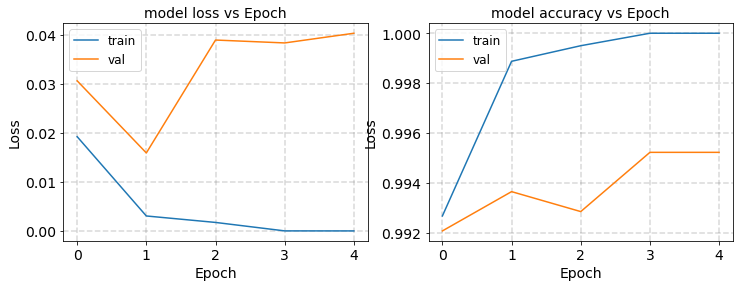

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0501 - accuracy: 0.9898 - val_loss: 0.0578 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0557 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 2.1743e-05 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 3.5214e-06 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 8.4465e-07 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9890


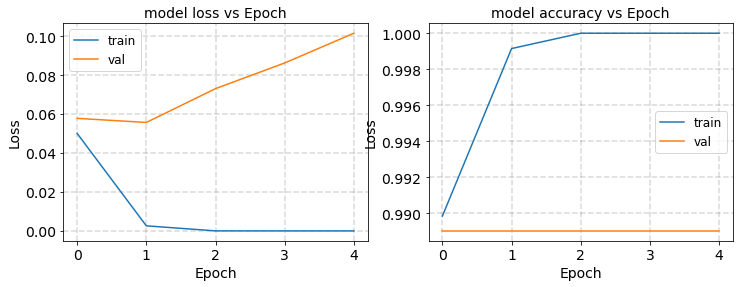

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0790 - accuracy: 0.9844 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0405 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 9.6681e-04 - accuracy: 0.9996 - val_loss: 0.0555 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 2.4041e-05 - accuracy: 1.0000 - val_loss: 0.0690 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 2.2548e-06 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9906


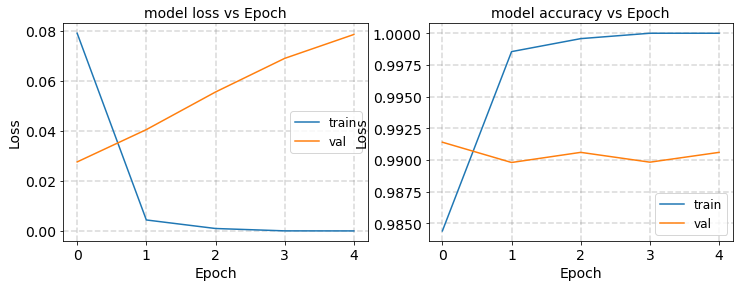

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0796 - accuracy: 0.9894 - val_loss: 0.0397 - val_accuracy: 0.9915
Epoch 2/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0625 - val_accuracy: 0.9860
Epoch 3/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0612 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 2.9960e-04 - accuracy: 0.9999 - val_loss: 0.0633 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.2518e-05 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9922


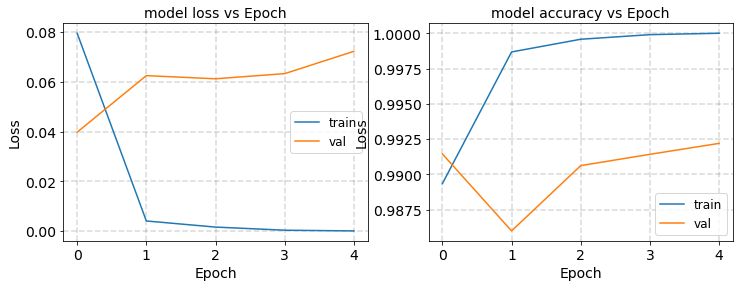

round1 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 2s - loss: 3.2650e-06 - accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 1.0747e-06 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 3.9764e-07 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 1.6973e-07 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 7.6972e-08 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9922


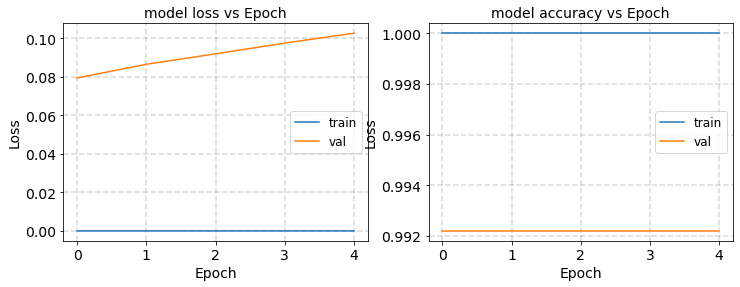

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0830 - accuracy: 0.9946 - val_loss: 0.0502 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 3.4004e-05 - accuracy: 1.0000 - val_loss: 0.0639 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 4.2830e-06 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 1.1235e-06 - accuracy: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 4.0745e-07 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9921


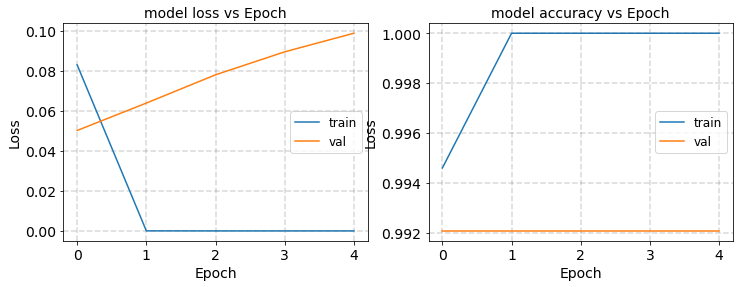

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0919 - accuracy: 0.9859 - val_loss: 0.0331 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 2s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0401 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 7.1133e-04 - accuracy: 0.9998 - val_loss: 0.0626 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 2s - loss: 1.6080e-05 - accuracy: 1.0000 - val_loss: 0.0685 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 2s - loss: 5.2720e-06 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 0.9945


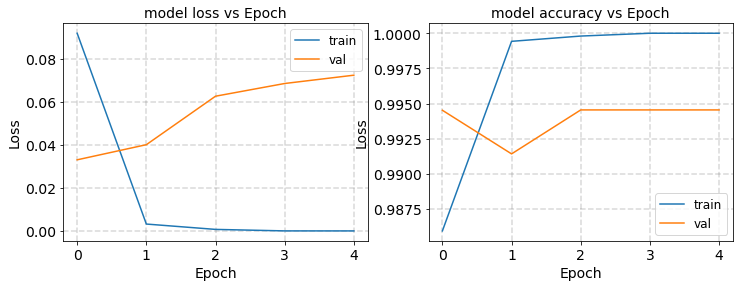

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0799 - accuracy: 0.9899 - val_loss: 0.0470 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0657 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 6.7857e-05 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 9.3105e-06 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 3.2097e-06 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9906


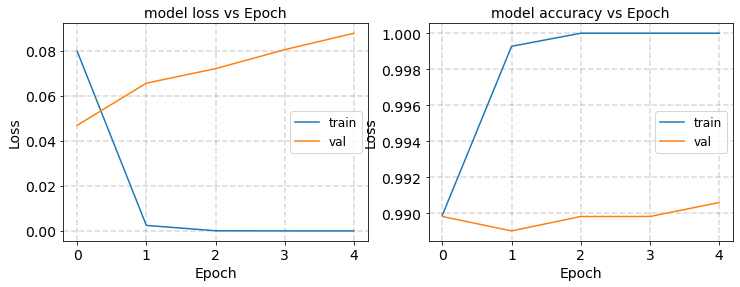

round2 [7 2 4 6]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0903 - accuracy: 0.9915 - val_loss: 0.0375 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0556 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 9.7536e-05 - accuracy: 1.0000 - val_loss: 0.0685 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 1.2911e-05 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 4.0678e-06 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9922


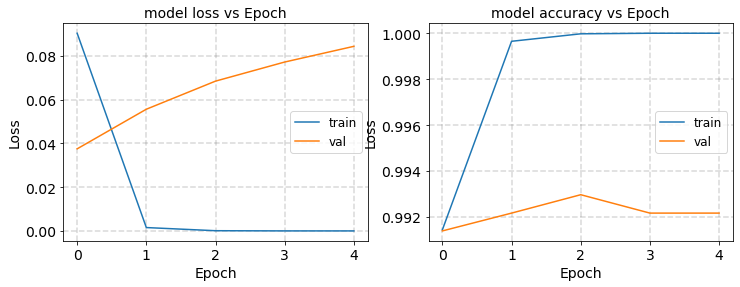

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0798 - accuracy: 0.9876 - val_loss: 0.0625 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0892 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 3.4021e-04 - accuracy: 0.9999 - val_loss: 0.0914 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 1.5201e-05 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 5.3057e-06 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 0.9866


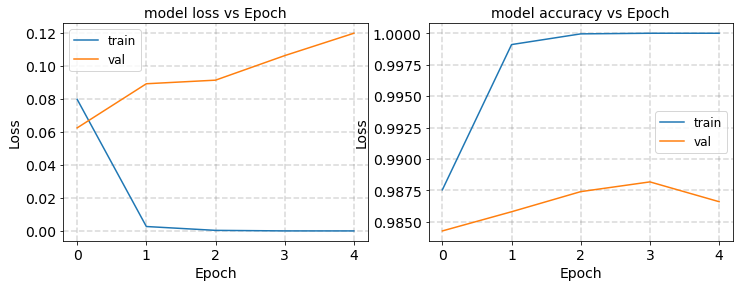

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0899 - accuracy: 0.9822 - val_loss: 0.0312 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0421 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 4.5964e-04 - accuracy: 0.9999 - val_loss: 0.0568 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 2s - loss: 6.2067e-05 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 1.2110e-05 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9913


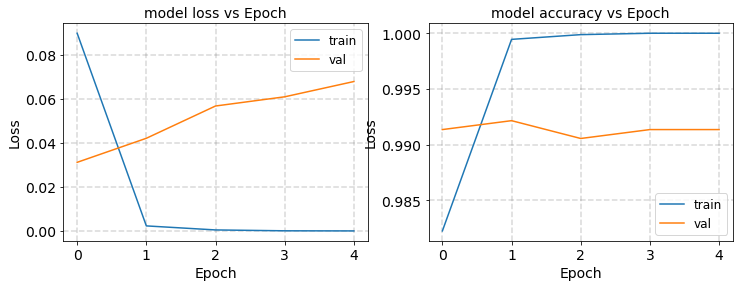

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0521 - accuracy: 0.9938 - val_loss: 0.0487 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 2s - loss: 3.3270e-04 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 2s - loss: 2.6396e-05 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 2s - loss: 7.2215e-06 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 2s - loss: 2.6848e-06 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9920


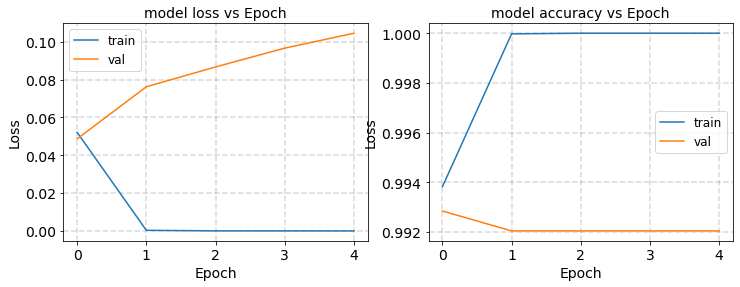

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

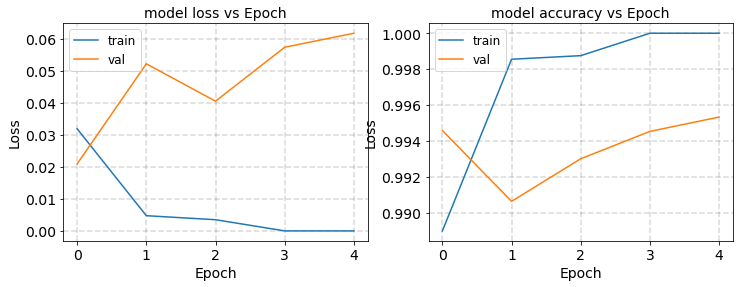

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0676 - accuracy: 0.9894 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0643 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 6.9773e-06 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 1.4022e-06 - accuracy: 1.0000 - val_loss: 0.0850 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 6.0401e-07 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9898


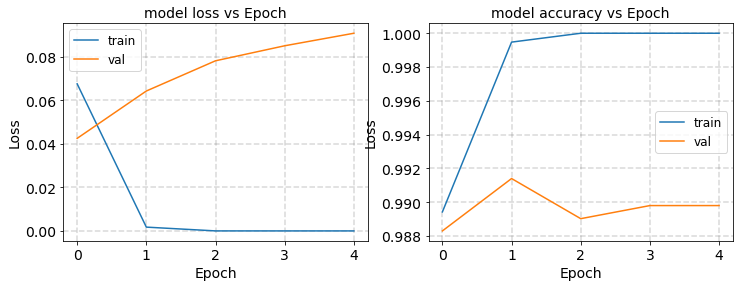

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0633 - accuracy: 0.9903 - val_loss: 0.0597 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0449 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 4.4139e-05 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 1.2514e-06 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 3.9941e-07 - accuracy: 1.0000 - val_loss: 0.0677 - val_accuracy: 0.9914


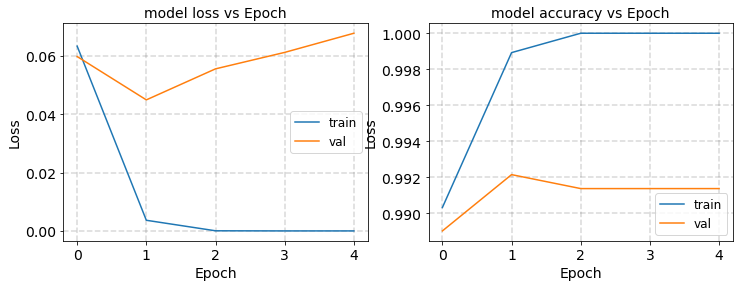

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0745 - accuracy: 0.9931 - val_loss: 0.0421 - val_accuracy: 0.9920
Epoch 2/5
1250/1250 - 2s - loss: 3.0719e-04 - accuracy: 0.9999 - val_loss: 0.0537 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 2s - loss: 1.2364e-05 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 2s - loss: 1.9695e-06 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 2s - loss: 6.2397e-07 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9936


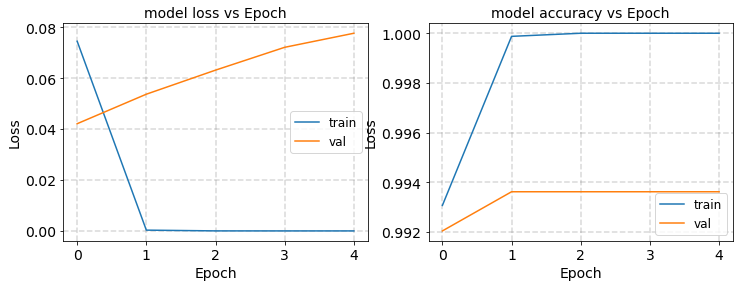

round1 [6 4 2 7]
6
Epoch 1/5
1250/1250 - 2s - loss: 2.5122e-07 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 2s - loss: 1.1488e-07 - accuracy: 1.0000 - val_loss: 0.0858 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 2s - loss: 5.5743e-08 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 2s - loss: 2.8556e-08 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 2s - loss: 1.4775e-08 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 0.9936


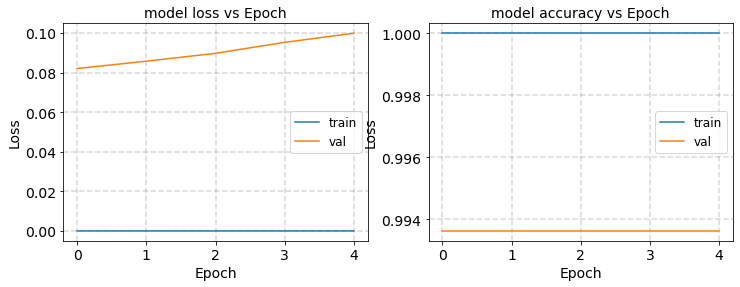

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0909 - accuracy: 0.9880 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0560 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0642 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 2.0434e-04 - accuracy: 0.9999 - val_loss: 0.0658 - val_accuracy: 0.9899
Epoch 5/5
1250/1250 - 2s - loss: 9.3038e-06 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9899


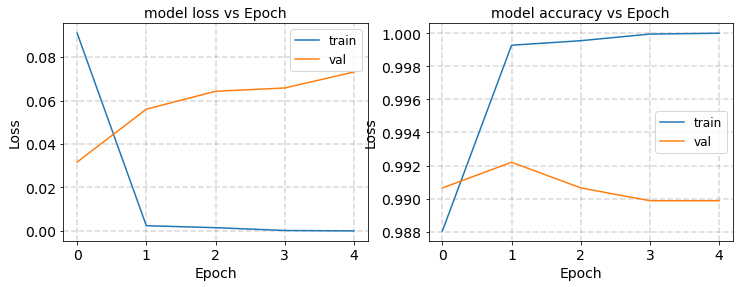

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0684 - accuracy: 0.9894 - val_loss: 0.0673 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0805 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 3.5485e-05 - accuracy: 1.0000 - val_loss: 0.0967 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 6.1187e-06 - accuracy: 1.0000 - val_loss: 0.1090 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 2s - loss: 2.0773e-06 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 0.9866


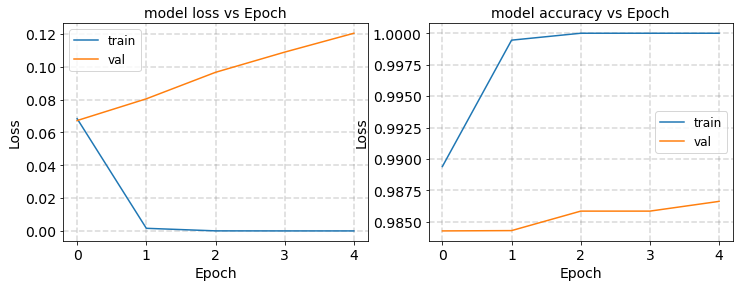

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0803 - accuracy: 0.9874 - val_loss: 0.0346 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0478 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 5.1423e-05 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 1.1766e-05 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 4.2588e-06 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9914


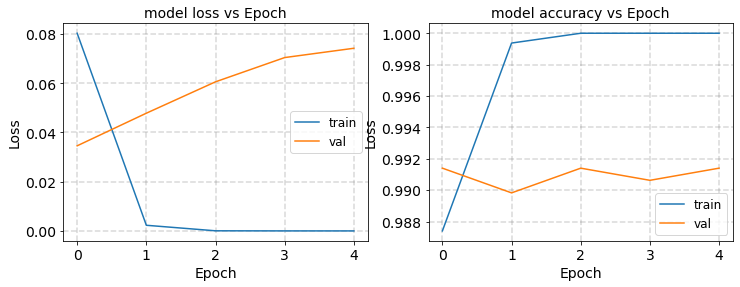

round2 [4 7 6 2]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.0742 - accuracy: 0.9855 - val_loss: 0.0501 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0446 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 6.3024e-04 - accuracy: 0.9999 - val_loss: 0.0616 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 2.0613e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 3.7691e-06 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9914


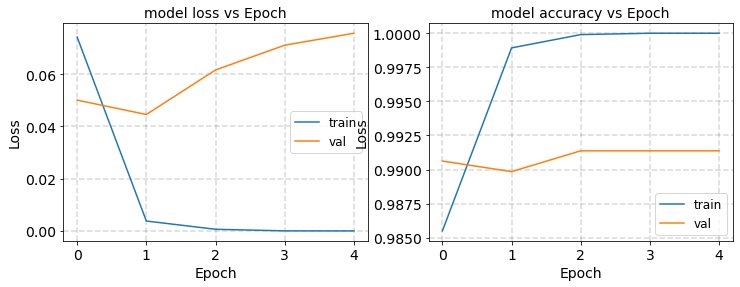

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0690 - accuracy: 0.9903 - val_loss: 0.0363 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0729 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0761 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 5.0227e-04 - accuracy: 0.9999 - val_loss: 0.0865 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0539 - val_accuracy: 0.9937


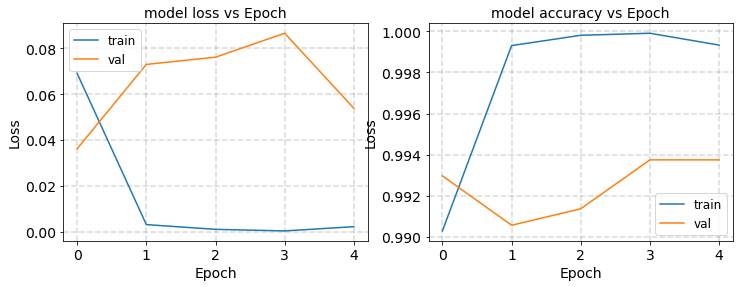

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1131 - accuracy: 0.9834 - val_loss: 0.0532 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 2s - loss: 2.3116e-04 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 3.6564e-05 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 1.1842e-05 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 2.4376e-06 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 0.9913


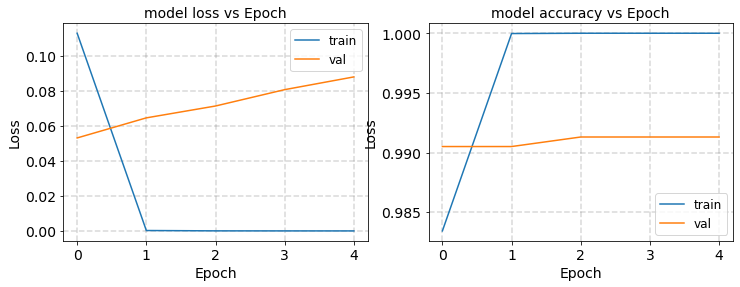

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0826 - accuracy: 0.9892 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 4.8434e-04 - accuracy: 0.9998 - val_loss: 0.0982 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 8.0301e-06 - accuracy: 1.0000 - val_loss: 0.1236 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 1.8390e-06 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 5.5743e-07 - accuracy: 1.0000 - val_loss: 0.1590 - val_accuracy: 0.9882


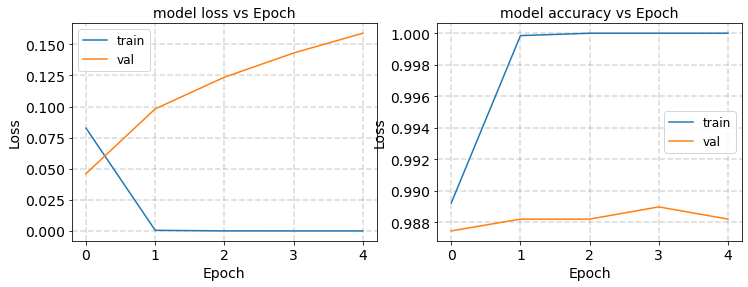

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

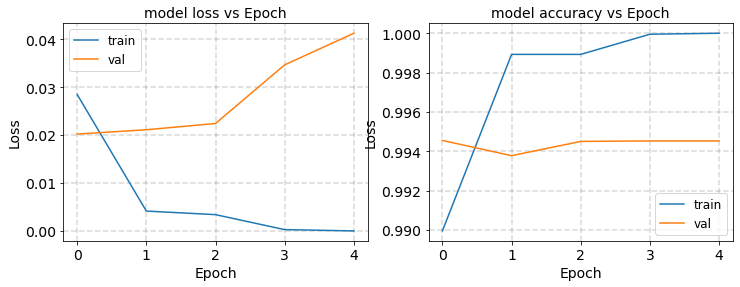

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0464 - accuracy: 0.9918 - val_loss: 0.0256 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0282 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 1.2817e-04 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 5.2973e-06 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.5225e-06 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9937


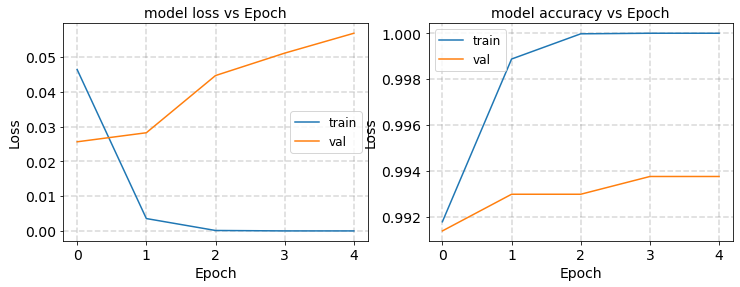

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0872 - accuracy: 0.9862 - val_loss: 0.0395 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0571 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 4.1888e-05 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.7332e-06 - accuracy: 1.0000 - val_loss: 0.1081 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 3.1204e-07 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 0.9890


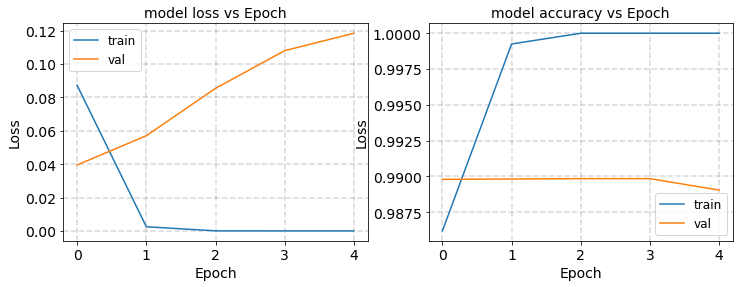

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0710 - accuracy: 0.9896 - val_loss: 0.0582 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 6.1745e-04 - accuracy: 0.9998 - val_loss: 0.0485 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 2s - loss: 9.4664e-06 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 1.1065e-06 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 4.6777e-07 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9952


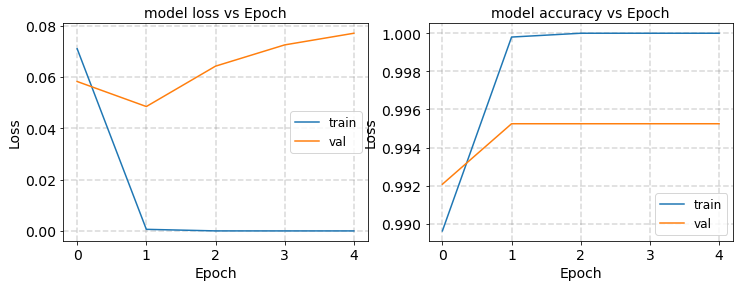

round1 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0822 - accuracy: 0.9860 - val_loss: 0.0178 - val_accuracy: 0.9953
Epoch 2/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0267 - val_accuracy: 0.9953
Epoch 3/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0420 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.4914e-04 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9977
Epoch 5/5
1250/1250 - 3s - loss: 1.2403e-05 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 0.9977


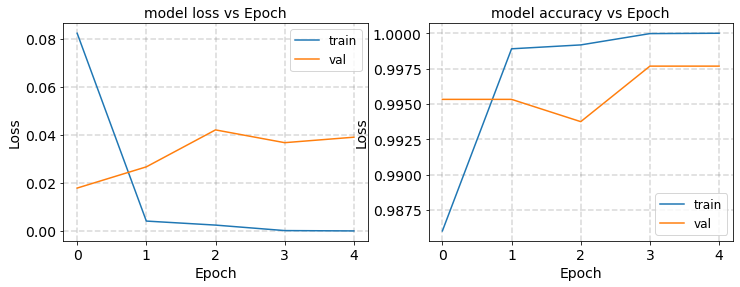

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0545 - accuracy: 0.9931 - val_loss: 0.0531 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 2s - loss: 2.2621e-04 - accuracy: 0.9999 - val_loss: 0.0657 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 9.9458e-06 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 3.9866e-06 - accuracy: 1.0000 - val_loss: 0.0875 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 8.2722e-07 - accuracy: 1.0000 - val_loss: 0.1056 - val_accuracy: 0.9921


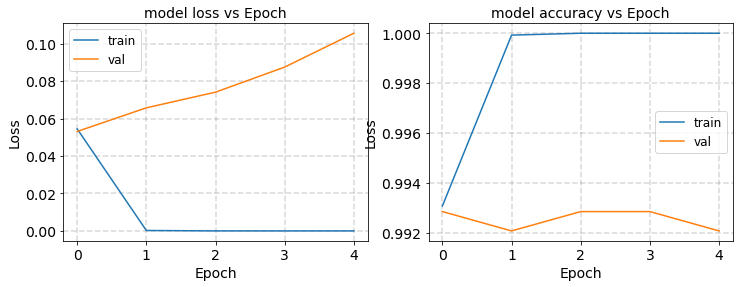

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1501 - accuracy: 0.9844 - val_loss: 0.0375 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 7.6942e-04 - accuracy: 0.9998 - val_loss: 0.0577 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 2.8104e-05 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 2.6992e-06 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 4.7227e-07 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9922


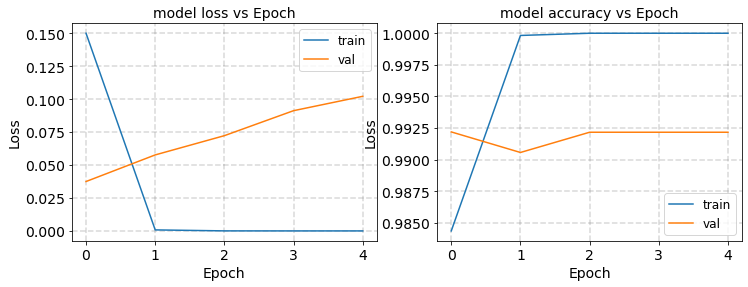

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1152 - accuracy: 0.9873 - val_loss: 0.0694 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0952 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 2s - loss: 5.2018e-04 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0926 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 2s - loss: 1.1856e-04 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9867


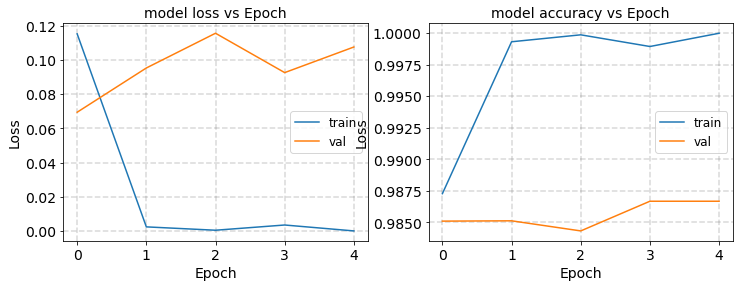

round2 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0665 - accuracy: 0.9888 - val_loss: 0.0358 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0426 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 5.9037e-04 - accuracy: 0.9999 - val_loss: 0.0470 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0472 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.0228e-04 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9938


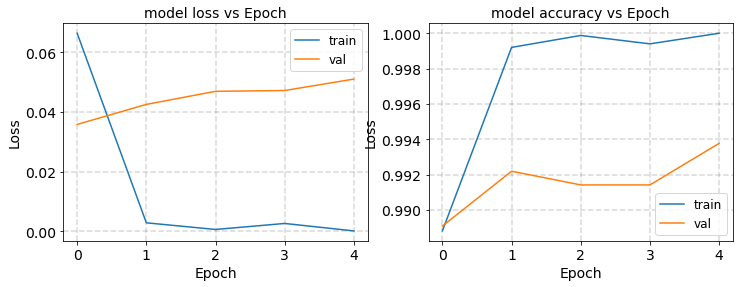

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0651 - accuracy: 0.9857 - val_loss: 0.0296 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0550 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0416 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 2s - loss: 1.2621e-04 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 2s - loss: 1.7517e-05 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9953


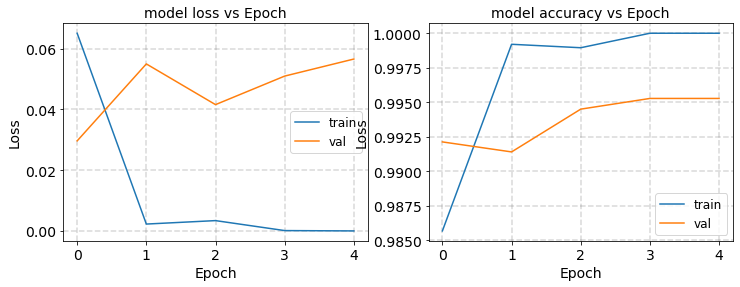

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0787 - accuracy: 0.9912 - val_loss: 0.0462 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 7.3442e-04 - accuracy: 0.9998 - val_loss: 0.0921 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 4.8446e-05 - accuracy: 1.0000 - val_loss: 0.1164 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 5.2602e-06 - accuracy: 1.0000 - val_loss: 0.1304 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 1.7453e-06 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 0.9921


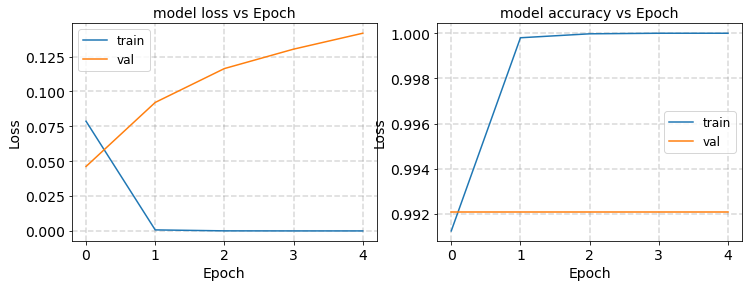

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1411 - accuracy: 0.9832 - val_loss: 0.0545 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0730 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 1.6953e-04 - accuracy: 0.9999 - val_loss: 0.1177 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0814 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 2.7498e-05 - accuracy: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9875


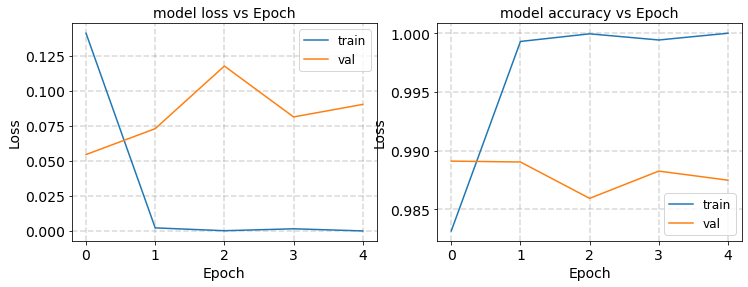

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 516       
Total params: 150,532
Trainable params: 150,532
Non-trainable params: 0
_______________________________________________

In [4]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_0_4_128_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=128,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_0_4_128_run0  2.04843         2.05347      0.0215521   
2467_seq_prune_0_4_128_run1  2.04463         2.01951      0.0169283   
2467_seq_prune_0_4_128_run2  2.00598         2.04345      0.0109964   
2467_seq_prune_0_4_128_run3  2.02666         2.06225      0.0182027   
2467_seq_prune_0_4_128_run4  2.00739         2.04579      0.0175617   
2467_seq_prune_0_4_128_run5  2.05409         2.06471      0.0444413   
2467_seq_prune_0_4_128_run6  1.99405         2.00979      0.0221324   
2467_seq_prune_0_4_128_run7   2.0756         2.05042      0.0364511   
2467_seq_prune_0_4_128_run8   2.0191          2.0658      0.0344684   
2467_seq_prune_0_4_128_run9  2.01295         2.05184      0.0158797   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_0_4_128_run0     0.00481919         45     0.9           No   
2467_seq_prune_0_4_128_run1     0.00378527         90     0.2           No   
2467_seq_prune_0_4_128_run2     0.00245887          0       0          Yes   
2467_seq_prune_0_4_128_run3     0.00407025         10     0.2           No   
2467_seq_prune_0_4_128_run4     0.00392692          0       0          Yes   
2467_seq_prune_0_4_128_run5     0.00993738         65     0.7           No   
2467_seq_prune_0_4_128_run6     0.00494896         25     0.5           No   
2467_seq_prune_0_4_128_run7     0.00815071         80     0.4           No   
2467_seq_prune_0_4_128_run8     0.00770738         10     0.2           No   
2467_seq_prune_0_4_128_run9     0.00355082          0       0          Yes   

                            Direction  Accuracy  
2467_seq_prune_0_4_128_run0   smaller  0.911325  
2467_seq_prune_0_4_128_run1    larger  0.971775  
2467_seq_prune_0_4_128_run2   smaller    0.9488  
2467_seq_prune_0_4_128_run3   smaller    0.9553  
2467_seq_prune_0_4_128_run4   smaller   0.95445  
2467_seq_prune_0_4_128_run5    larger  0.905375  
2467_seq_prune_0_4_128_run6   smaller    0.9663  
2467_seq_prune_0_4_128_run7    larger  0.941225  
2467_seq_prune_0_4_128_run8   smaller    0.9671  
2467_seq_prune_0_4_128_run9   smaller  0.958425

#### Save dataframe

In [6]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_0_4_128_run0  2.04843         2.05347      0.0215521   
2467_seq_prune_0_4_128_run1  2.04463         2.01951      0.0169283   
2467_seq_prune_0_4_128_run2  2.00598         2.04345      0.0109964   
2467_seq_prune_0_4_128_run3  2.02666         2.06225      0.0182027   
2467_seq_prune_0_4_128_run4  2.00739         2.04579      0.0175617   
2467_seq_prune_0_4_128_run5  2.05409         2.06471      0.0444413   
2467_seq_prune_0_4_128_run6  1.99405         2.00979      0.0221324   
2467_seq_prune_0_4_128_run7   2.0756         2.05042      0.0364511   
2467_seq_prune_0_4_128_run8   2.0191          2.0658      0.0344684   
2467_seq_prune_0_4_128_run9  2.01295         2.05184      0.0158797   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_0_4_128_run0     0.00481919         45     0.9           No   
2467_seq_prune_0_4_128_run1     0.00378527         90     0.2           No   
2467_seq_prune_0_4_128_run2     0.00245887          0       0          Yes   
2467_seq_prune_0_4_128_run3     0.00407025         10     0.2           No   
2467_seq_prune_0_4_128_run4     0.00392692          0       0          Yes   
2467_seq_prune_0_4_128_run5     0.00993738         65     0.7           No   
2467_seq_prune_0_4_128_run6     0.00494896         25     0.5           No   
2467_seq_prune_0_4_128_run7     0.00815071         80     0.4           No   
2467_seq_prune_0_4_128_run8     0.00770738         10     0.2           No   
2467_seq_prune_0_4_128_run9     0.00355082          0       0          Yes   

                            Direction  Accuracy  
2467_seq_prune_0_4_128_run0   smaller  0.911325  
2467_seq_prune_0_4_128_run1    larger  0.971775  
2467_seq_prune_0_4_128_run2   smaller    0.9488  
2467_seq_prune_0_4_128_run3   smaller    0.9553  
2467_seq_prune_0_4_128_run4   smaller   0.95445  
2467_seq_prune_0_4_128_run5    larger  0.905375  
2467_seq_prune_0_4_128_run6   smaller    0.9663  
2467_seq_prune_0_4_128_run7    larger  0.941225  
2467_seq_prune_0_4_128_run8   smaller    0.9671  
2467_seq_prune_0_4_128_run9   smaller  0.958425

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.01780133, -0.07578604,  0.01730581, ...,  0.03910024,
        -0.05355491,  0.01697545],
       [-0.01867689,  0.06179411,  0.02838708, ..., -0.01755598,
         0.05850864,  0.03533982],
       [ 0.01043352,  0.04228169,  0.01005118, ..., -0.05998462,
        -0.05224497, -0.03556828],
       ...,
       [-0.00202332, -0.0046795 ,  0.04688283, ..., -0.07364929,
        -0.02582334, -0.06001481],
       [-0.01198516, -0.03915791,  0.07798889, ..., -0.05756695,
         0.0752848 ,  0.03305977],
       [ 0.0001636 ,  0.0250108 ,  0.05278628, ..., -0.06843165,
         0.05768601,  0.00325475]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

2.0484305149812063
2.053472042693114
0.02155205968838806
0.004819187051836864
45.0
0.9
No
smaller
0.9113249778747559
